# DSE 200 FINAL PROJECT
## Fall 2021
### Due Date:  December 3rd, 2021

# Name: Carlos Monsivais

The final project is comprised of two parts: 
* <b>Part I</b> is a set of coding questions that require the _numpy_ library to analyze the provided dataset.  
* <b>Part II</b> is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _IO_, _pandas_, _matplotlib_ and _scilit-learn_ libraries.  

<b>Deliverables</b>: Submit both parts as one notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for Part II and reproduce your results. The notebook should be organized with a clear table of contents on top _(see example in the Pylaski notebook at https://github.com/words-sdsc/wifire/blob/master/pylaski.ipynb)_ and links to the parts/steps outlined. Don't forget to add your name on top as the author of the notebook. 

# Table of Contents:
* [Part 1](#first-part)
* [Part 2](#second-part)
* [Final Project: Step 0. Set Up](#set-up)
* [Final Project: Step 1. Find a Dataset](#find-data)
    * [Step 1.1: What is the data?](#data-what)
    * [Step 1.2: Kaggle vs Scrapy Data](#kaggle-v-scrapy)
        * [1.2.1: Why I scraped my data instead of using Kaggle's set?](#kaggle-explain)
        * [1.2.2: Football Manager 2021 Scrapy](#scrapy1)
        * [1.2.3: Football Manager 2022 Scrapy](#scrapy2)
    * [Step 1.3: Clean Data](#clean-data)
        * [Step 1.3.1: Dataset 1 --> Football Manager 2021](#data-1)
        * [Step 1.3.2: Dataset 2 --> Football Manager 2022](#data-2)
        * [Step 1.3.3: Dataset Missing Values Plots](#missing_vals-1)
    * [Step 1.4: Merged Data](#merge-data)
    * [Step 1.5: Final Datasets View](#final-data)   
* [Step 2: Explore the datasets](#step-2) 
    * [Step 2.1: Relationships Between Variables](#step-2-1)   
    * [Step 2.2: Common Trends ](#step-2-2)    
    * [Step 2.3: Data Quality and Distributions ](#step-2-3)
    * [Step 2.4: Interesting Correlations](#step-2-4)
* [Step 3: Identify 1-3 research questions and perform analysis](#step-3)
    * [Step 3.1: Question 1](#step-3-1)
        * [Step 3.1.1: Selecting Numeric Values for K-Means Clustering](#step-3-1-1)
        * [Step 3.1.2: Scaling Values with Mean of 0 and Standard Deviation of 1](#step-3-1-2)
        * [Step 3.1.3: Choosing a Value of K Using the Elbow Method](#step-3-1-3)
        * [Step 3.1.4: Re-Running with k = 3 and Assigning Cluster to Data](#step-3-1-4)
        * [Step 3.1.5: Comparing Cluster Plots](#step-3-1-5)     
    * [Step 3.2: Question 2](#step-3-2)
        * [Step 3.2.1: Selecting Modelling Values for Linear Regression](#step-3-2-1)
        * [Step 3.2.2: Splitting Data into Training and Testing](#step-3-2-2)
        * [Step 3.2.3: Scaling Modelling Value](#step-3-2-3)
        * [Step 3.2.4: Fitting the Model and Getting Coefficients](#step-3-2-4)
        * [Step 3.2.5: Model Prediction and Performance](#step-3-2-5)      
    * [Step 3.3: Question 3](#step-3-3)
         * [Step 3.3.1: Preparing Data](#step-3-3-1)
        * [Step 3.3.2: Defining Top Prospects](#step-3-3-2)
        * [Step 3.3.3: Rescaling Data](#step-3-3-3)
        * [Step 3.3.4: Heatmap of year over year Improvements](#step-3-3-4)
        * [Step 3.3.5: Hierarchical Clustering](#step-3-3-5)
        
* [Step 4: Present your findings](#step-4)
    * [Limitations](#limit) 
    * [Step 4.1: Finding Overlooked Players](#step-4-1)  
    * [Step 4.2: The Most Important Traits](#step-4-2)      
    * [Step 4.3: Year Over Year Improvements](#step-4-3)

# PART I: 20% <a id='first-part'></a>

### Preliminaries

In [1]:
import numpy as np

### 1.1 Preliminaries

Use numpy to load `prostate_cancer.npy` into a numpy matrix. Print the dataset's shape and the first 5 rows.<br>

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [2]:
# For reference
column_names = ['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
                'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
diagnosis_encoding = {'Benign': 0, 'Malignant': 1}

In [3]:
# Load data
data = np.load('prostate_cancer.npy', allow_pickle=True)

# Your code here
print('The shape of the data set is {}.'.format(data.shape))

data[:5, :]

The shape of the data set is (100, 10).


array([[1, 'M', 23, 12, 151, 954, 0.143, 0.278, 0.242, 0.079],
       [2, 'B', 9, 13, 133, 1326, 0.143, 0.079, 0.181, 0.057],
       [3, 'M', 21, 27, 130, 1203, 0.125, 0.16, 0.207, 0.06],
       [4, 'M', 14, 16, 78, 386, 0.07, 0.284, 0.26, 0.097],
       [5, 'M', 9, 19, 135, 1297, 0.141, 0.133, 0.181, 0.059]],
      dtype=object)

### 1.2  Transformations

* The first column is the id of the patient, which isn't relevant for our purposes. Remove that column from the matrix by creating a new matrix composed of the rest of the columns.
* The second column is the `diagnosis_result` i.e. **M** for malignant and **B** for benign. Replace **M** with `1` and **B** with `0`
* Convert the `dtype` of the resulting array to `np.float64`
* As usual, print the shape of the resulting dataset and the first 5 rows.

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [4]:
new_data = data[:,1:]
new_data[:, 0] = np.where(new_data[:, 0] == 'M', 1, 0)
new_data[:, 0] = new_data[:, 0].astype(np.float64)
print('The shape of the resulting array is {}'.format(new_data.shape))
new_data[:5, :]

The shape of the resulting array is (100, 9)


array([[1.0, 23, 12, 151, 954, 0.143, 0.278, 0.242, 0.079],
       [0.0, 9, 13, 133, 1326, 0.143, 0.079, 0.181, 0.057],
       [1.0, 21, 27, 130, 1203, 0.125, 0.16, 0.207, 0.06],
       [1.0, 14, 16, 78, 386, 0.07, 0.284, 0.26, 0.097],
       [1.0, 9, 19, 135, 1297, 0.141, 0.133, 0.181, 0.059]], dtype=object)

### 1.3 Summary Statistics

**a)** Print the means and standard deviations of each column

**Output required**: 
<ul>
    <li>Floats representing the mean of each column</li>
    <li>Floats representing the standard deviation of each column</li>
</ul>

In [5]:
new_data = new_data.astype('float')
new_columns = column_names[1:]

In [6]:
means = np.mean(new_data, axis = 0)
sdevs = np.std(new_data, axis = 0)

values = range(0, len(means))
for i in values:
    print('Column = {}, Mean: {}, Standard Deviation: {}'.format(new_columns[i], means[i], sdevs[i]))

Column = diagnosis_result, Mean: 0.62, Standard Deviation: 0.4853864439804639
Column = radius, Mean: 16.85, Standard Deviation: 4.854636958620078
Column = texture, Mean: 18.23, Standard Deviation: 5.166923649522992
Column = perimeter, Mean: 96.78, Standard Deviation: 23.557410723591843
Column = area, Mean: 702.88, Standard Deviation: 318.1083236886454
Column = smoothness, Mean: 0.10273000000000002, Standard Deviation: 0.014568359550752445
Column = compactness, Mean: 0.1267, Standard Deviation: 0.06083707751034726
Column = symmetry, Mean: 0.19317000000000004, Standard Deviation: 0.030630721506356977
Column = fractal_dimension, Mean: 0.06469, Standard Deviation: 0.008110110973346789


**b)** Print the minimum and maximum values of each column

**Output required**: 
<ul>
    <li>Floats representing the minimum value found in each column</li>
    <li>Floats representing the maximum value found in each column</li>
</ul>

In [7]:
maximum = np.max(new_data, axis = 0)
minimum = np.min(new_data, axis = 0)

values = range(0, len(means))
for i in values:
    print('Column = {}, Maximum: {}, Minimum: {}'.format(new_columns[i], maximum[i], minimum[i]))

Column = diagnosis_result, Maximum: 1.0, Minimum: 0.0
Column = radius, Maximum: 25.0, Minimum: 9.0
Column = texture, Maximum: 27.0, Minimum: 11.0
Column = perimeter, Maximum: 172.0, Minimum: 52.0
Column = area, Maximum: 1878.0, Minimum: 202.0
Column = smoothness, Maximum: 0.143, Minimum: 0.07
Column = compactness, Maximum: 0.345, Minimum: 0.038
Column = symmetry, Maximum: 0.304, Minimum: 0.135
Column = fractal_dimension, Maximum: 0.097, Minimum: 0.053


**c)** Calculate the `diagnosis_result`-wise means and standard deviations.<br>
**Report these values with respect to the actual *name* of the result, for which you must refer to 1.1**

**Output required**: 
<ul>
    <li>For each of the 2 results in the dataset:<ul>
        <li>Floats representing the standard deviation of each column for this result</li>
        <li>Floats representing the mean of each column for this result</li>
</ul>

In [8]:
malignent = new_data[np.where(new_data[:,0] == 1.0)]
malignent = malignent[:, 1:]
malign_mean = np.mean(malignent, axis = 0)
malign_sdevs = np.std(malignent, axis = 0)

benign = new_data[np.where(new_data[:,0] == 0.0)]
benign = benign[:, 1:]
benign_mean = np.mean(benign, axis = 0)
benign_sdevs = np.std(benign, axis = 0)

In [9]:
last_columns = column_names[2:]
values = range(0, len(malign_mean))
for i in values:
    print('Malignent {}, Mean: {}, Standard Deviation: {}'.format(last_columns[i], malign_mean[i], malign_sdevs[i]))
    
print('\n')
for i in values:
    print('Benign {}, Mean: {}, Standard Deviation: {}'.format(last_columns[i], benign_mean[i], benign_sdevs[i]))

Malignent radius, Mean: 16.177419354838708, Standard Deviation: 4.640370513392318
Malignent texture, Mean: 18.516129032258064, Standard Deviation: 5.176690733576095
Malignent perimeter, Mean: 107.98387096774194, Standard Deviation: 19.5559511076625
Malignent area, Mean: 842.9516129032259, Standard Deviation: 287.754623707666
Malignent smoothness, Mean: 0.10498387096774195, Standard Deviation: 0.013826682870781305
Malignent compactness, Mean: 0.1510967741935484, Standard Deviation: 0.05768790046935246
Malignent symmetry, Mean: 0.19875806451612907, Standard Deviation: 0.02991745929131434
Malignent fractal_dimension, Mean: 0.06474193548387099, Standard Deviation: 0.008347175461758671


Benign radius, Mean: 17.94736842105263, Standard Deviation: 4.994456761045203
Benign texture, Mean: 17.763157894736842, Standard Deviation: 5.116712608935318
Benign perimeter, Mean: 78.5, Standard Deviation: 17.24704398776177
Benign area, Mean: 474.3421052631579, Standard Deviation: 216.69494399607618
Benig

# PART II : 80% <a id='second-part'></a>

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.

There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

## Step 0 Set Up <a id='set-up'></a>

In order to run this notebook, please use the virtual environment I created called fm_env by running the code below, it has all the packages needed to runthis notebook.

In [10]:
! source fm_scrape_env/bin/activate

Below are the libararies I used for this project.

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

plt.rcParams["figure.figsize"] = (20,10)
seed = 42

## Step 1: Find a dataset or datasets <a id='find-data'></a>

Based on your interest, identify a dataset which you will want to examine.  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about. 
 

This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask. You are expected to use at least two interconnected datasets, e.g., two tables in one database or a combination of datasets which you can merge in some meaningful way.


## Step 1.1: What is the data <a id='data-what'></a>

The Football Manager data sets are a real world soccer player database where player traits are scored on a scale of 1(bad) to 20(good) based on their soccer playing abilities such as dribbling, heading, speed, etc. This database is actually used when professional soccer teams such as Everton and Chelsea look to scout players.

In [12]:
# Football Manager 21
fb_21 = pd.read_csv('football_manager_21.csv', parse_dates = ['Contract end'])
fb_21.rename(columns={'Value': 'Sell value'}, inplace = True)

# Football Manager 22
fb_22 = pd.read_csv('football_manager_22.csv', parse_dates = ['Contract end'])

## Step 1.2: Kaggle vs Scrapy Data <a id='kaggle-v-scrapy'></a>

### Step 1.2.1: Why I scraped my data instead of using Kaggle's set? <a id='kaggle-explain'></a>

I ended up deciding to create a web-crawler using Python's Scrapy framework because I was not satisfied with the data Kaggle gave me. 

1. Kaggle only had datasets for the Football Manager video game from 2017 and 2020 and as I went through my analysis by answering my 3 questions I ended up needing data from two consecutive years to look at immediate change. 

2. I was able to extract all of the player attributes myself, and Kaggle had some attributes it was not able to extract such as the Unique player ID I was going to use to merge the players instead of how I did it before which was just based on their player names, giving me a bigger sample size of the merged data.

3. I was able to extract more players than the Kaggle data set for example:
| Kaggle     | Web-Scraped |
| ----------- | ----------- |
| File: 2017 --> Number of Players: 159541      | File: 2021 --> Number of Players: 159107      |
| File: 2020 --> Number of Players: 144750   | File: 2022 --> Number of Players: 208331       |

4. To make the datasets I web-scraped accessible, I have posted it on my Github page in this repository where they are stored as zip files:\
Website Scraped: https://fminside.net/players \
Repository: https://github.com/carlosmonsivais123/Football-Manager-Project \
2021 Zipped File: https://github.com/carlosmonsivais123/Football-Manager-Project/blob/main/football_manager_21.csv.zip \
2022 Zipped File: https://github.com/carlosmonsivais123/Football-Manager-Project/blob/main/football_manager_22.csv.zip

5. For completion, I have provided the links to the Kaggle datasets I did not use:\
a. https://www.kaggle.com/ajinkyablaze/football-manager-data \
b. https://www.kaggle.com/ktyptorio/football-manager-2020

### Step 1.2.2: Football Manager 2021 Scrapy <a id='scrapy1'></a>

<b>Here is the Scrapy web-scraper I built for the Football Manager 2021 data. Only run if you want to re-scrape the data, otherwise I used the %%script false --no-raise-error to not run this cell because then it would write over the current data.</b>

In [13]:
%%script false --no-raise-error
import scrapy
from scrapy.http import Request
from scrapy.crawler import CrawlerProcess

class FbManager_21_Spider(scrapy.Spider):
    name = 'fb_manager_21'
    start_urls = ['https://fminside.net/players/']

    custom_settings = {
    'FEED_FORMAT': 'csv',
    'FEED_URI': 'football_manager_21.csv',
    'FEED_EXPORT_ENCODING': 'utf-8',
    'LOG_ENABLED': False,
    'ROBOTSTXT_OBEY': False,

    "DOWNLOAD_DELAY": 0,
    'DOWNLOAD_TIMEOUT': 30,
    'RANDOMIZE_DOWNLOAD_DELAY': True,

    'REACTOR_THREADPOOL_MAXSIZE': 128,
    'CONCURRENT_REQUESTS': 256,
    'CONCURRENT_REQUESTS_PER_DOMAIN': 256,
    'CONCURRENT_REQUESTS_PER_IP': 256,

    'AUTOTHROTTLE_ENABLED': True,
    'AUTOTHROTTLE_START_DELAY': 1,
    'AUTOTHROTTLE_MAX_DELAY': 0.25,
    'AUTOTHROTTLE_TARGET_CONCURRENCY': 128,
    'AUTOTHROTTLE_DEBUG': True,

    'RETRY_ENABLED': True,
    'RETRY_TIMES': 3,
    'RETRY_HTTP_CODES': [500, 502, 503, 504, 400, 401, 403, 404, 405, 406, 407, 408, 409, 410, 429]}

    def parse(self, response):
        player_links = response.css("a[href*='/players/2-fm-22/']::attr(href)").extract()

        a = 0
        for string in player_links:
            player_links[a] = string.replace("2-fm-22",'1-fm-21')
            a = a + 1

        i = 0
        while i < len(player_links):
            recipelink = 'https://fminside.net/' + player_links[i]
            yield Request(recipelink, callback = self.parse_player_url, dont_filter = True)
            i = i + 1
            
        else:
            next_page = 'https://fminside.net/beheer/modules/players/resources/inc/frontend/generate-player-table.php?ajax_request=1&loadmore=true#'
            yield Request(next_page, callback = self.parse, dont_filter = True)


    def parse_player_url(self, response):
        # Player Meta Section
        meta_dict = {'Club': response.css("div[class = 'meta']>ul>li>a[href*='/clubs/']>span::text").extract(),
                    'Nation': response.css("div[class = 'meta']>ul>li>span>a[href*='/players/']::text").extract(),
                    'Ability': response.css("div[class = 'meta']>span[id = 'ability']::text").extract(),
                    'Potential': response.css("div[class = 'meta']>span[id = 'potential']::text").extract()}

        # Player Info and Contract Sections
        column_check = response.css("div[class = 'column']>h2::text").extract()

        information_columns = ['Name', 'Age', 'Position', 'Foot', 'Length', 'Weight', 'Caps / Goals', 'Unique ID']
        if 'Player info' in column_check:
            info_keys = response.css("div[class = 'column']:contains('Player info')>ul>li>span[class = 'key'] ::text").extract()
            info_keys.remove('Position')
            info_values = response.css("div[class = 'column']:contains('Player info')>ul>li>span[class = 'value']::text").extract()

            position_key = ['Position']
            position_values = response.css("div[class = 'column']:contains('Player info')>ul>li>span[class ='value']>span[class = 'desktop_positions']>span[class = 'position natural']::text").extract()

            info_keys = info_keys + position_key
            info_values = info_values + [position_values]

            info_dict = dict(zip(info_keys, info_values))
        else:
            info_dict = dict.fromkeys(information_columns, None)


        contract_columns = ['Sell value', 'Wages', 'Contract end']
        if 'Contract' in column_check:
            contract_keys = response.css("div[class = 'column']:contains('Contract')>ul>li>span[class = 'key'] ::text").extract()
            contract_values = response.css("div[class = 'column']:contains('Contract')>ul>li>span[class = 'value'] ::text").extract()

            contract_dict = dict(zip(contract_keys, contract_values))
        else:
            contract_dict = dict.fromkeys(contract_columns, None)

        # Attributes Section
        player_attribute_text = response.css("div[id = 'player_info']>div[id = 'right_column']>div[class = 'block stats']>div>table>tr>td>acronym::text").extract()
        player_attribute_values = response.css("div[id = 'player_info']>div[id = 'right_column']>div[class = 'block stats']>div>table>tr>td::text").extract()

        attribute_dict = dict(zip(player_attribute_text, player_attribute_values))

        outfield_attribute_text = ['Corners', 'Crossing', 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading', 
                                   'Long Shots', 'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling', 'Technique', 
                                   'Aggression', 'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Decisions', 'Determination', 
                                   'Flair', 'Leadership', 'Off the Ball', 'Positioning', 'Teamwork', 'Vision', 'Work Rate', 
                                   'Acceleration', 'Agility', 'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 
                                   'Stamina', 'Strength']
        goalie_attributes_text = ['Aerial Reach', 'Command of Area', 'Communication', 'Eccentricity', 'First Touch', 'Handling', 
                                  'Kicking', 'One on Ones', 'Passing', 'Punching (Tendency)', 'Reflexes', 'Rushing Out (Tendency)', 
                                  'Throwing', 'Aggression', 'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Decisions', 
                                  'Determination', 'Flair', 'Leadership', 'Off the Ball', 'Positioning', 'Teamwork', 'Vision', 
                                  'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 
                                  'Stamina', 'Strength', 'Free Kick Taking', 'Penalty Taking', 'Technique']

        all_attributes_text = outfield_attribute_text + goalie_attributes_text
        all_attributes_dict = dict.fromkeys(all_attributes_text, None)

        for value in all_attributes_dict:
            if value in attribute_dict:
                all_attributes_dict[value]  = attribute_dict[value]

        # Best Roles(Suitable)
        suitable_role_dict = {'Roles': [response.css("div[class = 'column']>ol[id = 'suitable']>li>span[class = 'key']::text").extract()],
                             'Rating': [response.css("div[class = 'column']>ol[id = 'suitable']>li>span[class = 'value']::text").extract()]
                             }

        final_dict = {**info_dict, **meta_dict, **contract_dict, **all_attributes_dict, **suitable_role_dict}  

        yield final_dict

process = CrawlerProcess()
process.crawl(FbManager_21_Spider)
process.start()

### Step 1.2.3: Football Manager 2022 Scrapy <a id='scrapy2'></a>

<b>Here is the Scrapy web-scraper I built for the Football Manager 2022 data. Only run if you want to re-scrape the data, otherwise I used the %%script false --no-raise-error to not run this cell because then it would write over the current data.</b>

In [14]:
%%script false --no-raise-error
import scrapy
from scrapy.http import Request
from scrapy.crawler import CrawlerProcess

class FbManager_22_Spider(scrapy.Spider):
    name = 'fb_manager_22'
    start_urls = ['https://fminside.net/players/']

    custom_settings = {
    'FEED_FORMAT': 'csv',
    'FEED_URI': 'football_manager_22.csv',
    'FEED_EXPORT_ENCODING': 'utf-8',
    'LOG_ENABLED': False,
    'ROBOTSTXT_OBEY': False,

    "DOWNLOAD_DELAY": 0,
    'DOWNLOAD_TIMEOUT': 30,
    'RANDOMIZE_DOWNLOAD_DELAY': True,

    'REACTOR_THREADPOOL_MAXSIZE': 128,
    'CONCURRENT_REQUESTS': 256,
    'CONCURRENT_REQUESTS_PER_DOMAIN': 256,
    'CONCURRENT_REQUESTS_PER_IP': 256,

    'AUTOTHROTTLE_ENABLED': True,
    'AUTOTHROTTLE_START_DELAY': 1,
    'AUTOTHROTTLE_MAX_DELAY': 0.25,
    'AUTOTHROTTLE_TARGET_CONCURRENCY': 128,
    'AUTOTHROTTLE_DEBUG': True,

    'RETRY_ENABLED': True,
    'RETRY_TIMES': 3,
    'RETRY_HTTP_CODES': [500, 502, 503, 504, 400, 401, 403, 404, 405, 406, 407, 408, 409, 410, 429]}

    def parse(self, response):
        player_links = response.css("a[href*='/players/2-fm-22/']::attr(href)").extract()

        i = 0
        while i < len(player_links):
            recipelink = 'https://fminside.net/' + player_links[i]
            yield Request(recipelink, callback = self.parse_player_url, dont_filter = True)
            i = i + 1
            
        else:
            next_page = 'https://fminside.net/beheer/modules/players/resources/inc/frontend/generate-player-table.php?ajax_request=1&loadmore=true#'
            yield Request(next_page, callback = self.parse, dont_filter = True)


    def parse_player_url(self, response):
        # Player Meta Section
        meta_dict = {'Club': response.css("div[class = 'meta']>ul>li>a[href*='/clubs/']>span::text").extract(),
                    'Nation': response.css("div[class = 'meta']>ul>li>span>a[href*='/players/']::text").extract(),
                    'Ability': response.css("div[class = 'meta']>span[id = 'ability']::text").extract(),
                    'Potential': response.css("div[class = 'meta']>span[id = 'potential']::text").extract()}

        # Player Info and Contract Sections
        column_check = response.css("div[class = 'column']>h2::text").extract()

        information_columns = ['Name', 'Age', 'Position', 'Foot', 'Length', 'Weight', 'Caps / Goals', 'Unique ID']
        if 'Player info' in column_check:
            info_keys = response.css("div[class = 'column']:contains('Player info')>ul>li>span[class = 'key'] ::text").extract()
            info_keys.remove('Position')
            info_values = response.css("div[class = 'column']:contains('Player info')>ul>li>span[class = 'value']::text").extract()

            position_key = ['Position']
            position_values = response.css("div[class = 'column']:contains('Player info')>ul>li>span[class ='value']>span[class = 'desktop_positions']>span[class = 'position natural']::text").extract()

            info_keys = info_keys + position_key
            info_values = info_values + [position_values]

            info_dict = dict(zip(info_keys, info_values))
        else:
            info_dict = dict.fromkeys(information_columns, None)


        contract_columns = ['Sell value', 'Wages', 'Contract end']
        if 'Contract' in column_check:
            contract_keys = response.css("div[class = 'column']:contains('Contract')>ul>li>span[class = 'key'] ::text").extract()
            contract_values = response.css("div[class = 'column']:contains('Contract')>ul>li>span[class = 'value'] ::text").extract()

            contract_dict = dict(zip(contract_keys, contract_values))
        else:
            contract_dict = dict.fromkeys(contract_columns, None)

        # Attributes Section
        player_attribute_text = response.css("div[id = 'player_info']>div[id = 'right_column']>div[class = 'block stats']>div>table>tr>td>acronym::text").extract()
        player_attribute_values = response.css("div[id = 'player_info']>div[id = 'right_column']>div[class = 'block stats']>div>table>tr>td::text").extract()

        attribute_dict = dict(zip(player_attribute_text, player_attribute_values))

        outfield_attribute_text = ['Corners', 'Crossing', 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading', 
                                   'Long Shots', 'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling', 'Technique', 
                                   'Aggression', 'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Decisions', 'Determination', 
                                   'Flair', 'Leadership', 'Off the Ball', 'Positioning', 'Teamwork', 'Vision', 'Work Rate', 
                                   'Acceleration', 'Agility', 'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 
                                   'Stamina', 'Strength']
        goalie_attributes_text = ['Aerial Reach', 'Command of Area', 'Communication', 'Eccentricity', 'First Touch', 'Handling', 
                                  'Kicking', 'One on Ones', 'Passing', 'Punching (Tendency)', 'Reflexes', 'Rushing Out (Tendency)', 
                                  'Throwing', 'Aggression', 'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Decisions', 
                                  'Determination', 'Flair', 'Leadership', 'Off the Ball', 'Positioning', 'Teamwork', 'Vision', 
                                  'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 
                                  'Stamina', 'Strength', 'Free Kick Taking', 'Penalty Taking', 'Technique']

        all_attributes_text = outfield_attribute_text + goalie_attributes_text
        all_attributes_dict = dict.fromkeys(all_attributes_text, None)

        for value in all_attributes_dict:
            if value in attribute_dict:
                all_attributes_dict[value]  = attribute_dict[value]

        # Best Roles(Suitable)
        suitable_role_dict = {'Roles': [response.css("div[class = 'column']>ol[id = 'suitable']>li>span[class = 'key']::text").extract()],
                             'Rating': [response.css("div[class = 'column']>ol[id = 'suitable']>li>span[class = 'value']::text").extract()]
                             }

        final_dict = {**info_dict, **meta_dict, **contract_dict, **all_attributes_dict, **suitable_role_dict}  

        yield final_dict

process = CrawlerProcess()
process.crawl(FbManager_22_Spider)
process.start()

## Step 1.3: Cleaning Data <a id='clean-data'></a>

Here is the class I created to clean the data sets and have re-usbaiity when cleaning both the Football Manager 2021 and Football Manager 2022 data sets.

I cleaned the data by removing any symbols and removing any rows that don't have a player name or Unique ID.

In [15]:
class Clean_Data:    
    def remove_null_name_rows(self, df):
        df = df.dropna(subset=['Name', 'Unique ID'])
        return df
    
    def select_columns(self, df, list_selected_columns):
        df = df[list_selected_columns]
        return df
    
    def clean_rows(self, df):
        df['Length'] = df['Length'].str.replace(' ', '')
        df['Length'] = df['Length'].str.replace('CM', '')
        
        df['Weight'] = df['Weight'].str.replace(' ', '')
        df['Weight'] = df['Weight'].str.replace('KG', '')
        
        df['Caps / Goals'] = df['Caps / Goals'].str.replace(' ', '')
        df[['Caps', 'Goals']] = df['Caps / Goals'].str.split('/', 1, expand=True)
        df = df.drop('Caps / Goals', axis=1)
        
        df['Wages'] = df['Wages'].str.replace(',', '')
        df['Wages'] = df['Wages'].str.replace('€ ', '')
        df['Wages'] = df['Wages'].str.replace(' pw', '')
        
        df['Sell value'] = df['Sell value'].str.replace('€ ', '')
        df['Sell value'] = df['Sell value'].str.replace(',', '')
        df['Sell value'] = df['Sell value'].replace({'nan': np.nan})
        df['Sell value'] = df['Sell value'].replace({'Not for sale': np.nan})

        df = df.replace({'nan': np.nan})

        return df        
    
    def change_column_schema(self, df, schema_dictionary):
        df = df.astype(schema_dictionary)
        
        return df
        
    def drop_duplicate_players(self, df):
        df.drop_duplicates(subset ="Unique ID", keep = False, inplace = True)
        
        return df

In [16]:
df_clean = Clean_Data()

### Step 1.3.1: Dataset 1 --> Football Manager 2021 <a id='data-1'></a>

Cleaning the first dataset Football Manager 2021

In [17]:
clean_fb21 = df_clean.remove_null_name_rows(df = fb_21)

columns_using = ['Name', 'Age', 'Foot', 'Length', 'Weight', 'Caps / Goals', 'Unique ID', 'Position', 'Club', 
                 'Nation', 'Ability', 'Potential', 'Sell value', 'Wages', 'Contract end', 'Corners', 'Crossing',
                 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
                 'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling', 'Technique', 'Aggression', 
                 'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Decisions', 'Determination', 'Flair', 
                 'Leadership', 'Off the Ball', 'Positioning', 'Teamwork', 'Vision', 'Work Rate',
                 'Acceleration', 'Agility', 'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 'Stamina', 
                 'Strength', 'Aerial Reach', 'Command of Area', 'Communication', 'Eccentricity', 'Handling',
                 'Kicking', 'One on Ones', 'Punching (Tendency)', 'Reflexes', 'Rushing Out (Tendency)', 'Throwing']
clean_fb21 = df_clean.select_columns(df = clean_fb21, 
                                     list_selected_columns = columns_using)

clean_fb21 = df_clean.clean_rows(df = clean_fb21)

dtype_schema = {'Unique ID': 'str',
                'Length': 'int64', 
                'Weight': 'int64', 
                'Ability': 'float64', 
                'Sell value': 'float64', 
                'Wages': 'float64',
                'Caps': 'float64', 
                'Goals': 'float64'}
clean_fb21 = df_clean.change_column_schema(df = clean_fb21, 
                                           schema_dictionary = dtype_schema)

clean_fb21['Unique ID'] = clean_fb21['Unique ID'].str.split('.').str[0]

clean_fb21 = df_clean.drop_duplicate_players(df = clean_fb21)

clean_fb21.reset_index(inplace = True, drop = True)

In [18]:
missing_value_count_fb21 = pd.DataFrame(clean_fb21.isna().sum()).reset_index(drop = False)
missing_value_count_fb21.columns = ['Column Name', 'Missing Value Counts']
missing_value_count_fb21.sort_values(by = ['Missing Value Counts'], ascending = False, inplace = True, ignore_index = True)
missing_value_count_fb21 = missing_value_count_fb21[missing_value_count_fb21['Missing Value Counts'] > 0]
missing_value_count_fb21['Percent of Missing Values'] = missing_value_count_fb21['Missing Value Counts']/len(clean_fb21)
missing_value_count_fb21['Percent of Missing Values'] = missing_value_count_fb21['Percent of Missing Values'] * 100

### Step 1.3.2: Dataset 2 --> Football Manager 2022 <a id='data-2'></a>

Cleaning the second dataset Football Manager 2022

In [19]:
clean_fb22 = df_clean.remove_null_name_rows(df = fb_22)

columns_using = ['Name', 'Age', 'Foot', 'Length', 'Weight', 'Caps / Goals', 'Unique ID', 'Position', 'Club', 
                 'Nation', 'Ability', 'Potential', 'Sell value', 'Wages', 'Contract end', 'Corners', 'Crossing',
                 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
                 'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling', 'Technique', 'Aggression', 
                 'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Decisions', 'Determination', 'Flair', 
                 'Leadership', 'Off the Ball', 'Positioning', 'Teamwork', 'Vision', 'Work Rate',
                 'Acceleration', 'Agility', 'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 'Stamina', 
                 'Strength', 'Aerial Reach', 'Command of Area', 'Communication', 'Eccentricity', 'Handling',
                 'Kicking', 'One on Ones', 'Punching (Tendency)', 'Reflexes', 'Rushing Out (Tendency)', 'Throwing']
clean_fb22 = df_clean.select_columns(df = clean_fb22, 
                                     list_selected_columns = columns_using)

clean_fb22 = df_clean.clean_rows(df = clean_fb22)

dtype_schema = {'Unique ID': 'str',
                'Length': 'int64', 
                'Weight': 'int64', 
                'Ability': 'float64', 
                'Sell value': 'float64', 
                'Wages': 'float64',
                'Caps': 'float64', 
                'Goals': 'float64'}
clean_fb22 = df_clean.change_column_schema(df = clean_fb22, 
                                           schema_dictionary = dtype_schema)

clean_fb22 = df_clean.drop_duplicate_players(df = clean_fb22)

clean_fb22.reset_index(inplace = True, drop = True)

In [20]:
missing_value_count_fb22 = pd.DataFrame(clean_fb22.isna().sum()).reset_index(drop = False)
missing_value_count_fb22.columns = ['Column Name', 'Missing Value Counts']
missing_value_count_fb22.sort_values(by = ['Missing Value Counts'], ascending = False, inplace = True, ignore_index = True)
missing_value_count_fb22 = missing_value_count_fb22[missing_value_count_fb22['Missing Value Counts'] > 0]
missing_value_count_fb22['Percent of Missing Values'] = missing_value_count_fb22['Missing Value Counts']/len(clean_fb22)
missing_value_count_fb22['Percent of Missing Values'] = missing_value_count_fb22['Percent of Missing Values'] * 100

### Step 1.3.3: Dataset Missing Values Plots <a id='missing_vals-1'></a>

In [21]:
print('''Data Set(Football Manager 2021): fb_21 --> Size Before Cleaning: {} --> Size After Cleaning: {}\n
Data Set(Football Manager 2022): fb_22 --> Size Before Cleaning: {} --> Size After Cleaning: {}'''.format(fb_21.shape,
                                                                                   clean_fb21.shape,
                                                                                   fb_22.shape,
                                                                                   clean_fb22.shape))

Data Set(Football Manager 2021): fb_21 --> Size Before Cleaning: (159107, 65) --> Size After Cleaning: (95259, 63)

Data Set(Football Manager 2022): fb_22 --> Size Before Cleaning: (208331, 64) --> Size After Cleaning: (207629, 63)


Here we can see a lot of the missing values are due to those being traits that a goalkeeper has. Goalkeepers have different player traits than players that are on the field, so this is nothing to worry about.

Text(767.7272727272725, 0.5, 'Rows')

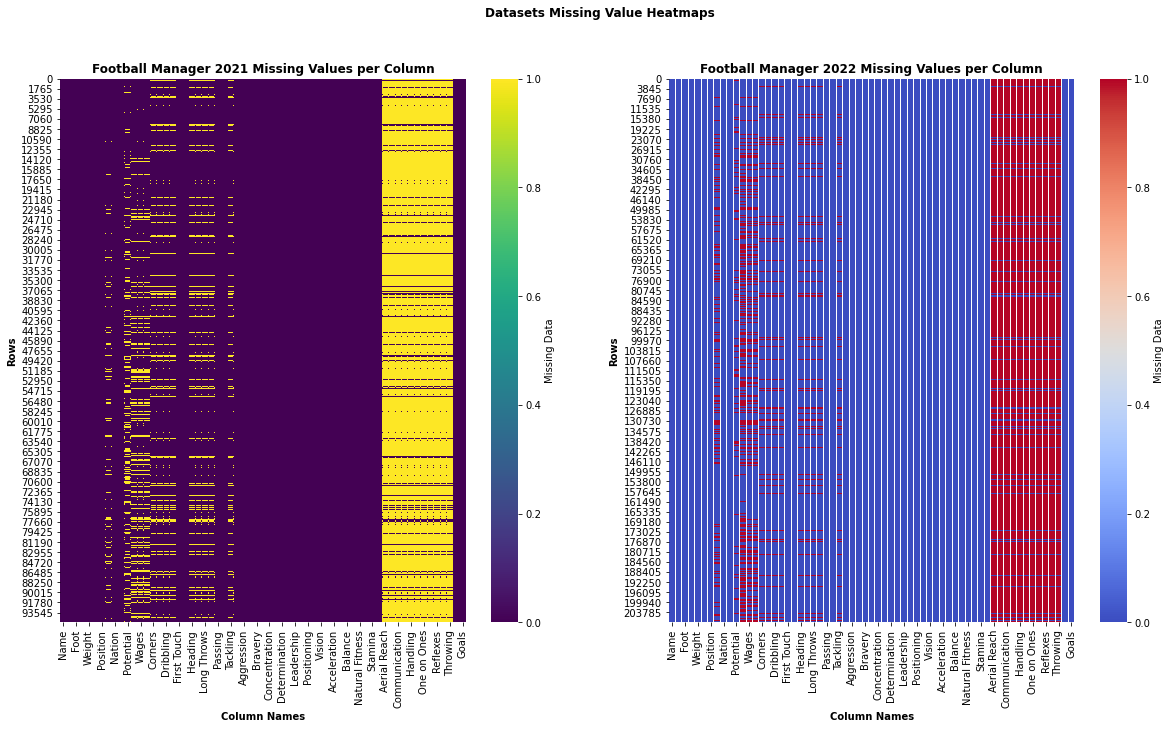

In [22]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle('Datasets Missing Value Heatmaps', fontweight='bold')

sns.heatmap(ax = ax1,
            data = clean_fb21.isna(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})
ax1.set_title('Football Manager 2021 Missing Values per Column', fontweight='bold')
ax1.set_xlabel('Column Names', fontweight='bold')
ax1.set_ylabel('Rows', fontweight='bold')

sns.heatmap(ax = ax2, 
            data = clean_fb22.isna(), 
            cmap="coolwarm",
            cbar_kws={'label': 'Missing Data'})
ax2.set_title('Football Manager 2022 Missing Values per Column', fontweight='bold')
ax2.set_xlabel('Column Names', fontweight='bold')
ax2.set_ylabel('Rows', fontweight='bold')

Similar percentages of missing values between the same columns in the Football 2021 and 2022 datasets.

<ipython-input-23-60d4aa546d19>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(missing_value_count_fb21['Column Name'].values), rotation = 90)
<ipython-input-23-60d4aa546d19>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(missing_value_count_fb22['Column Name'].values), rotation = 90)


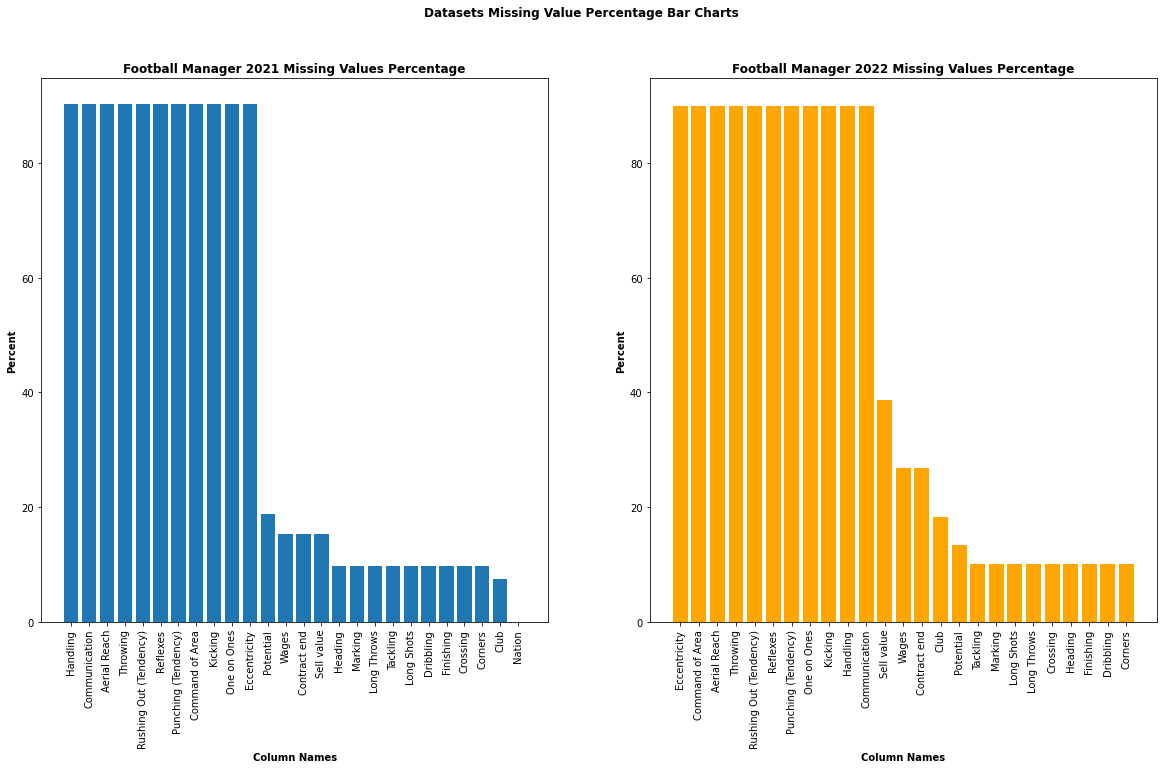

In [23]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle('Datasets Missing Value Percentage Bar Charts', fontweight='bold')

ax1.bar('Column Name', 'Percent of Missing Values', data = missing_value_count_fb21)
ax1.set_title('Football Manager 2021 Missing Values Percentage', fontweight='bold')
ax1.set_xlabel('Column Names', fontweight='bold')
ax1.set_xticklabels(list(missing_value_count_fb21['Column Name'].values), rotation = 90)
ax1.set_ylabel('Percent', fontweight='bold')

ax2.bar('Column Name', 'Percent of Missing Values', data = missing_value_count_fb22, color = 'orange')
ax2.set_title('Football Manager 2022 Missing Values Percentage', fontweight='bold')
ax2.set_xlabel('Column Names', fontweight='bold', )
ax2.set_xticklabels(list(missing_value_count_fb22['Column Name'].values), rotation = 90)
ax2.set_ylabel('Percent', fontweight='bold')

ax1.get_shared_y_axes().join(ax1, ax2)

## Step 1.4: Merging Data <a id='merge-data'></a>

Merging the datasets to create a third data set that I will use to see player improvements over time by subtracting the datasets player statstics year over year.

In [24]:
pd.options.mode.chained_assignment = None

numeric_fb21 = clean_fb21.select_dtypes(include=np.number)
numeric_fb21["Unique ID"] = clean_fb21[['Unique ID']]
numeric_fb21["Name"] = clean_fb21[['Name']]

numeric_fb22 = clean_fb22.select_dtypes(include=np.number)
numeric_fb22["Unique ID"] = clean_fb22[['Unique ID']]
numeric_fb22["Name"] = clean_fb22[['Name']]

numeric_merge = pd.merge(numeric_fb21, numeric_fb22, on = ['Unique ID', 'Name'], how = 'inner')

numeric_merge_columns = list(numeric_merge.columns)

fb21_numeric_columns = []
fb22_numeric_columns = []

for value in numeric_merge_columns:
    if '_x' in value:
        fb21_numeric_columns.append(value)
    
    elif '_y' in value:
        fb22_numeric_columns.append(value)  

numeric_merge_fb21 = numeric_merge[fb21_numeric_columns]
i = 0
for column in fb21_numeric_columns:
    fb21_numeric_columns[i] = column.replace('_x', '')
    i = i + 1
numeric_merge_fb21.columns = fb21_numeric_columns

numeric_merge_fb22 = numeric_merge[fb22_numeric_columns]
j = 0
for column in fb22_numeric_columns:
    fb22_numeric_columns[j] = column.replace('_y', '')
    j = j + 1
numeric_merge_fb22.columns = fb22_numeric_columns

difference_merge_df = numeric_merge_fb22.subtract(numeric_merge_fb21)
difference_merge_df['Unique ID'] = numeric_merge['Unique ID']
difference_merge_df['Name'] = numeric_merge['Name']

need_columns = ['Name', 'Foot', 'Unique ID', 'Position', 'Nation']

unique_name_needed = list(difference_merge_df['Name'].values)
unique_id_needed = list(difference_merge_df['Unique ID'].values)

second_merge_values = clean_fb22[(clean_fb22['Name'].isin(unique_name_needed)) & (clean_fb22['Unique ID'].isin(unique_id_needed))][need_columns].reset_index(drop = True)

final_merge_difference = pd.merge(difference_merge_df, second_merge_values, on = ['Unique ID', 'Name'], how = 'inner')

## Step 1.5: Final Datasets View <a id='final-data'></a>

The following three data sets I will use are:
1. Football Manager 2021: clean_fb21 --> Data with player information for the year 2021
2. Football Manager 2022: clean_fb22 --> Data with player information for the year 2022
3. Merged Difference Data: final_merge_difference --> I subtracted the 2022 players numerical values from the 2021 data set to look at player improveents over a year in their statistics. 

In [25]:
clean_fb21

,Name,Age,Foot,Length,Weight,Unique ID,Position,Club,Nation,Ability,...,Eccentricity,Handling,Kicking,One on Ones,Punching (Tendency),Reflexes,Rushing Out (Tendency),Throwing,Caps,Goals
0,Lionel Messi,33.0,Left,170,72,7458500,"AMR,AMC,ST",FC Barcelona,Argentina,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,68.0
1,Thomas Müller,30.0,Right,186,74,35011448,"MR,AMR,AMC,ST",Bayern München,Germany,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,38.0
2,Sergio Ramos,34.0,Right,184,83,7458272,DC,Real Madrid,Spain,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,21.0
3,Bernardo Silva,25.0,Left,173,64,55041632,"MC,AMR,AMC",Manchester City,Portugal,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,6.0
4,Ederson,26.0,Left,188,86,55057659,GK,Manchester City,Brazil,84.0,...,15.0,15.0,20.0,15.0,6.0,16.0,17.0,17.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95254,Artturi Paavola,20.0,Right,187,0,33080315,DC,NaN,Finland,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
95255,Billy Scott,28.0,Right,185,84,88022999,DC,North Wellington,New Zealand,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
95256,Mokeri Senwamadi,24.0,Right,174,69,65041803,MC,Swallows FC,South Africa,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
95257,Miljan Krpic,17.0,Right,188,79,2000037188,"DM,MC",Puskás Akadémia,Serbia,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [26]:
clean_fb22

,Name,Age,Foot,Length,Weight,Unique ID,Position,Club,Nation,Ability,...,Eccentricity,Handling,Kicking,One on Ones,Punching (Tendency),Reflexes,Rushing Out (Tendency),Throwing,Caps,Goals
0,Lionel Messi,33,Left,169,67,7458500,"AMR,AMC,ST",Paris Saint-Germain,Argentina,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,76.0
1,Sergej Milinkovic-Savic,26,Right,191,82,62127037,MC,Lazio,Serbia,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,3.0
2,Thiago,30,Right,174,70,67022040,"DM,MC",Liverpool,Spain,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,2.0
3,Fabinho,27,Right,188,78,19183676,"DC,DM",Liverpool,Brazil,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.0
4,Raphaël Varane,28,Right,191,81,85075627,DC,Man Utd,France,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207624,Yimis van Leeuwen,23,Right,194,0,2000012935,DC,DETO,Netherlands,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
207625,Sam Dowell,34,Right,183,0,82072345,DC,Renegades FC,United States,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
207626,Hussain Al-Niada,33,Right,191,0,23078116,MR,NaN,Kuwait,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
207627,Tsotne Kinkladze,19,Right,191,0,59139145,ST,NaN,Georgia,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [27]:
final_merge_difference

,Age,Length,Weight,Ability,Potential,Sell value,Wages,Corners,Crossing,Dribbling,...,Reflexes,Rushing Out (Tendency),Throwing,Caps,Goals,Unique ID,Name,Foot,Position,Nation
0,0.0,-1,-5,-1.0,0.0,NaN,19680.0,0.0,0.0,0.0,...,NaN,NaN,NaN,15.0,8.0,7458500,Lionel Messi,Left,"AMR,AMC,ST",Argentina
1,1.0,0,2,4.0,1.0,NaN,46280.0,-1.0,2.0,1.0,...,NaN,NaN,NaN,105.0,1.0,35011448,Thomas Müller,Right,"AMR,AMC",Germany
2,1.0,0,-1,-2.0,0.0,NaN,-113700.0,0.0,0.0,0.0,...,NaN,NaN,NaN,163.0,2.0,7458272,Sergio Ramos,Right,DC,Spain
3,1.0,0,0,-1.0,0.0,69970531.0,45600.0,0.0,-1.0,0.0,...,NaN,NaN,NaN,16.0,1.0,55041632,Bernardo Silva,Left,"MC,AMR,AMC",Portugal
4,1.0,0,0,1.0,0.0,197222462.0,100600.0,NaN,NaN,NaN,...,-1.0,0.0,0.0,7.0,0.0,55057659,Ederson,Left,GK,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95159,1.0,5,0,0.0,0.0,NaN,NaN,2.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,33080315,Artturi Paavola,Right,DC,Finland
95160,1.0,0,0,0.0,-5.0,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,88022999,Billy Scott,Right,DC,New Zealand
95161,0.0,11,-69,0.0,0.0,6846.0,-45.0,-1.0,-2.0,-4.0,...,NaN,NaN,NaN,0.0,0.0,65041803,Mokeri Senwamadi,Right,MC,South Africa
95162,0.0,0,0,34.0,0.0,11999.0,10.0,1.0,1.0,2.0,...,NaN,NaN,NaN,0.0,0.0,2000037188,Miljan Krpic,Right,"DM,MC",Serbia


## Step 2: Explore the datasets <a id='step-2'></a>

In this step, you should explore what is present in the data and how the data is organized. You’ll need to determine what common features allow you to merge the datasets.  

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

You are also expected to use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

### Step 2.1: Relationships Between Variables <a id='step-2-1'></a>

1. Some very interesting relatioships between the variables is the physical compoenent in the sense that if we look at the weight variable and the sell value variable it looks like players that are valued higher in these components are players that aren't too extreme on either side. For example, players that weigh too little or too much aren;t considered as valauable as players that are in the middle.

2. Another interesting relationship is that for the variable relationships between the Football Manager 2021 and Football Manager 2022 is almost the exact same.This is expected because not a lot can change over the course for most players.

3. Somehting else to note is the number of goals and potential variables, as a player scores more goals, his potential increases. This is to be expected and a good sign that the data makes sense.

#### Football Manager 2021 Pairplot

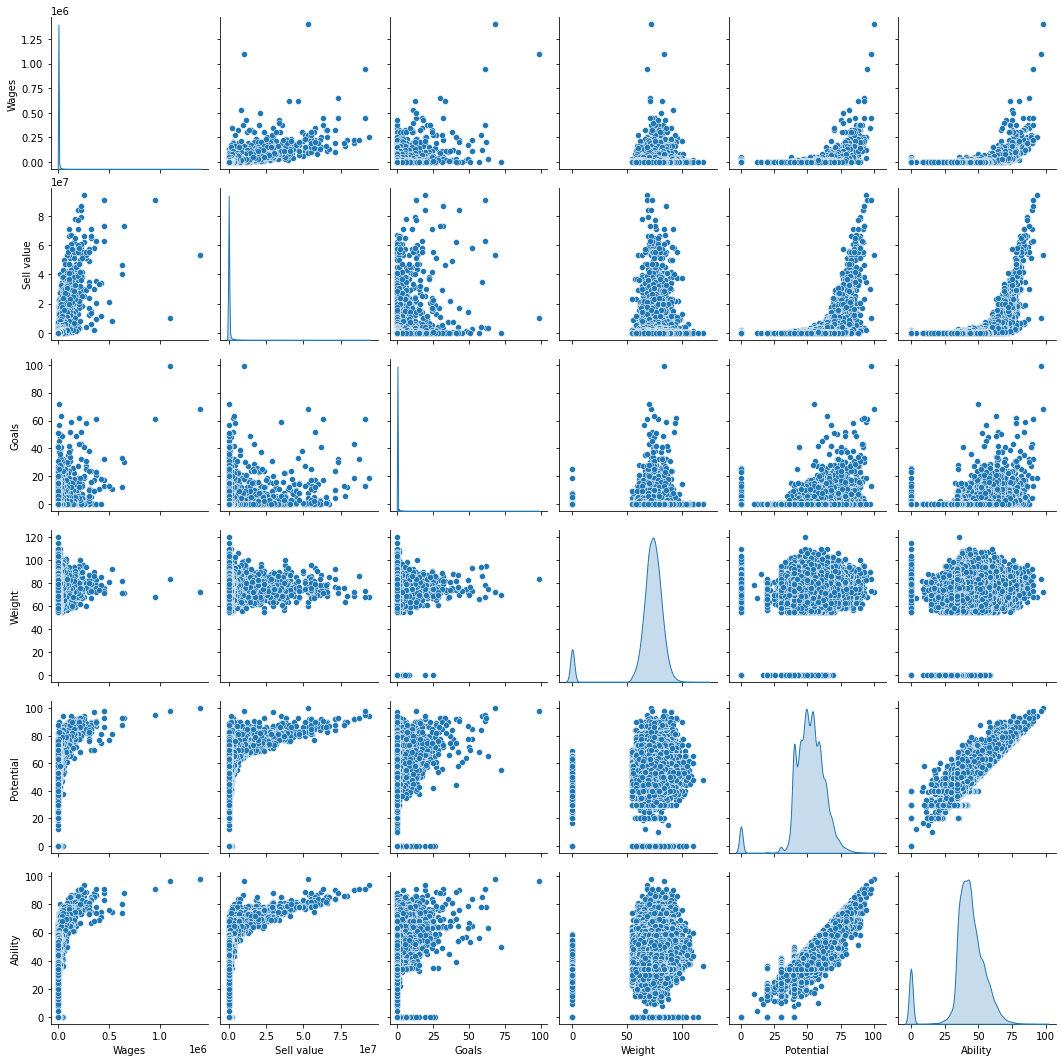

In [28]:
sns.pairplot(clean_fb21[['Wages', 'Sell value', 'Goals', 'Weight', 'Potential', 'Ability']], diag_kind = 'kde')

#### Football Manager 2022 Pairplot

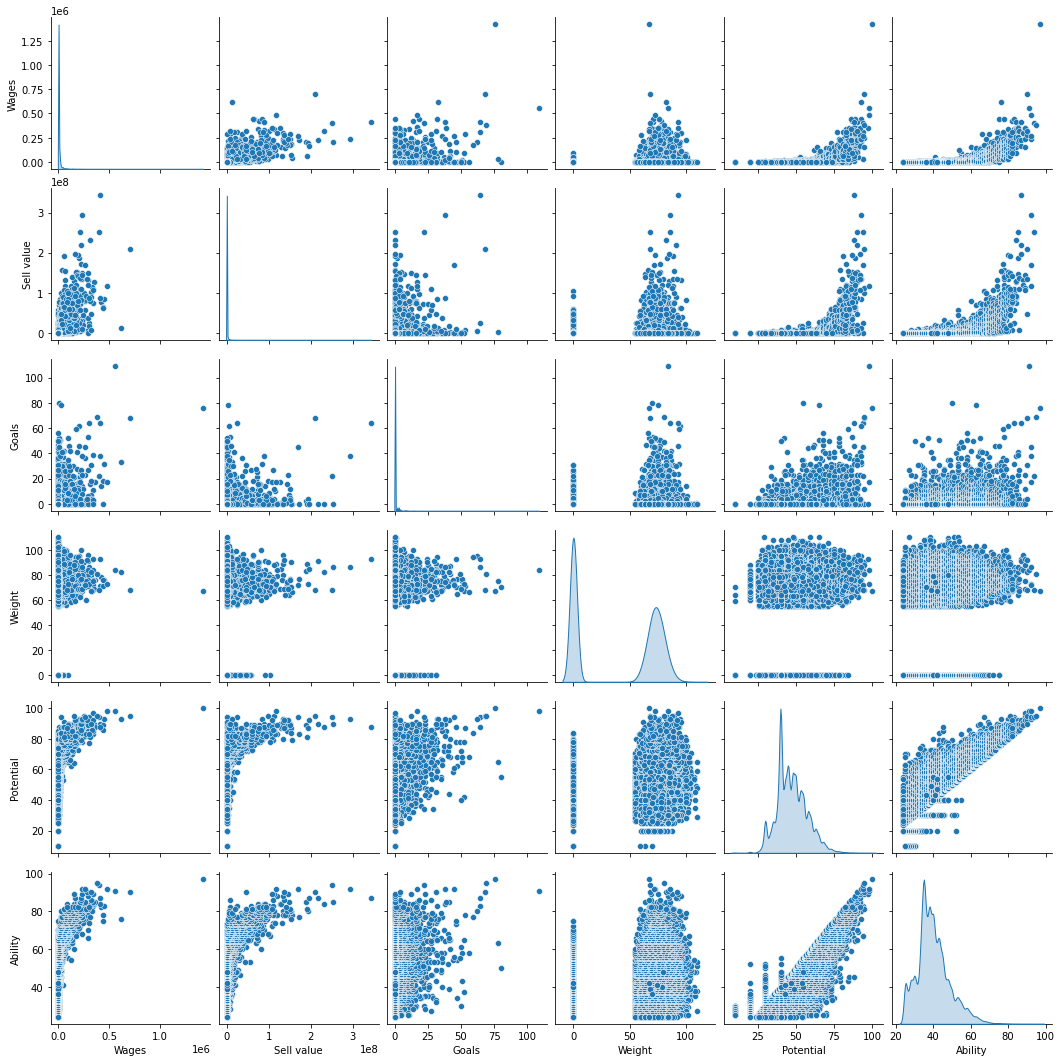

In [29]:
sns.pairplot(clean_fb22[['Wages', 'Sell value', 'Goals', 'Weight', 'Potential', 'Ability']], diag_kind = 'kde')

### Step 2.2: Common Trends <a id='step-2-2'></a>

Some very common trends are that for both the Football Manager 2021 and Football Manager 2022 values, Potential Ability and Current Ability are given almost the same weight when it comes down to a player's sell value and wage. So a young player that looks like he will have a good career will be given extremely high wages and a high value and will be treated higher than his current ability.

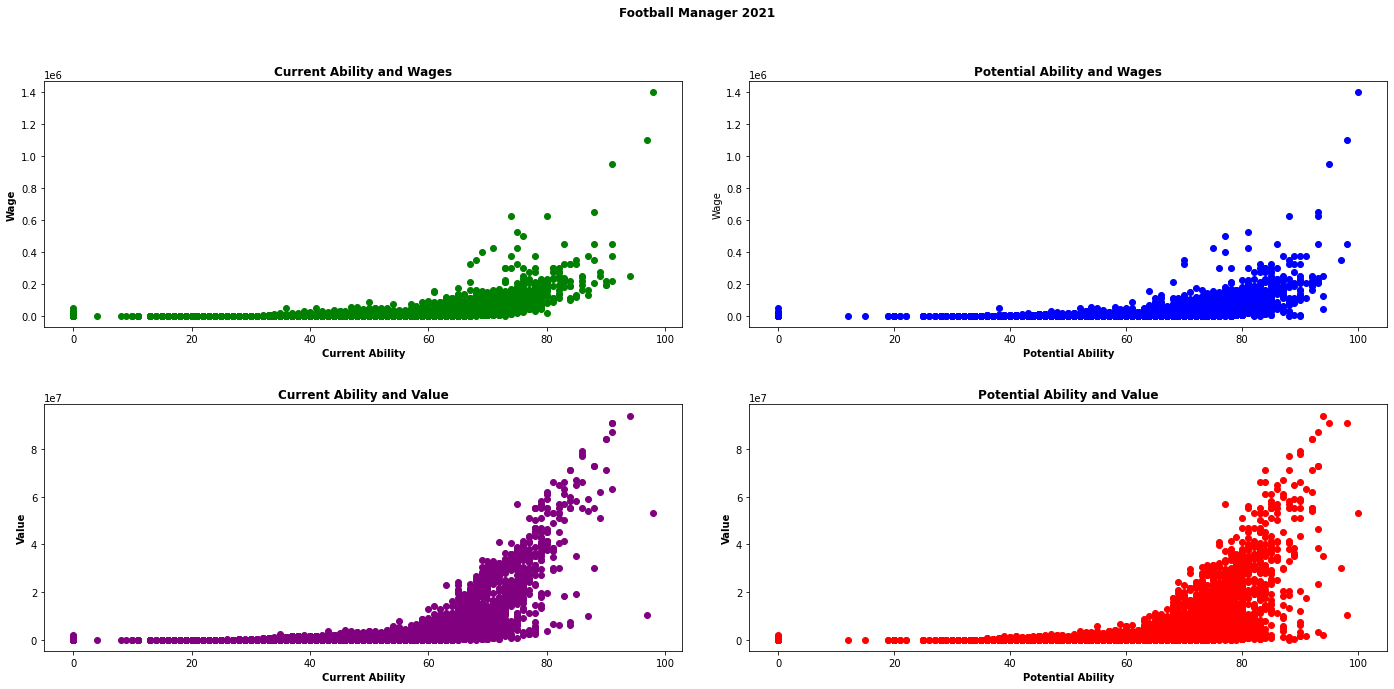

In [30]:
fig, axs = plt.subplots(2, 2)

fig.suptitle('Football Manager 2021', fontweight='bold')

axs[0, 0].scatter(clean_fb21['Ability'], clean_fb21['Wages'], color = 'green')
axs[0, 0].set_title('Current Ability and Wages', fontweight='bold')
axs[0, 0].set_xlabel('Current Ability', fontweight='bold')
axs[0, 0].set_ylabel('Wage', fontweight='bold')

axs[0, 1].scatter(clean_fb21['Potential'], clean_fb21['Wages'], color = 'blue')
axs[0, 1].set_title('Potential Ability and Wages', fontweight='bold')
axs[0, 1].set_xlabel('Potential Ability', fontweight='bold')
axs[0, 1].set_ylabel('Wage')

axs[1, 0].scatter(clean_fb21['Ability'], clean_fb21['Sell value'], color = 'purple')
axs[1, 0].set_title('Current Ability and Value', fontweight='bold')
axs[1, 0].set_xlabel('Current Ability', fontweight='bold')
axs[1, 0].set_ylabel('Value', fontweight='bold')

axs[1, 1].scatter(clean_fb21['Potential'], clean_fb21['Sell value'], color = 'red')
axs[1, 1].set_title('Potential Ability and Value', fontweight='bold')
axs[1, 1].set_xlabel('Potential Ability', fontweight='bold')
axs[1, 1].set_ylabel('Value', fontweight='bold')

fig.tight_layout(pad=3.0)

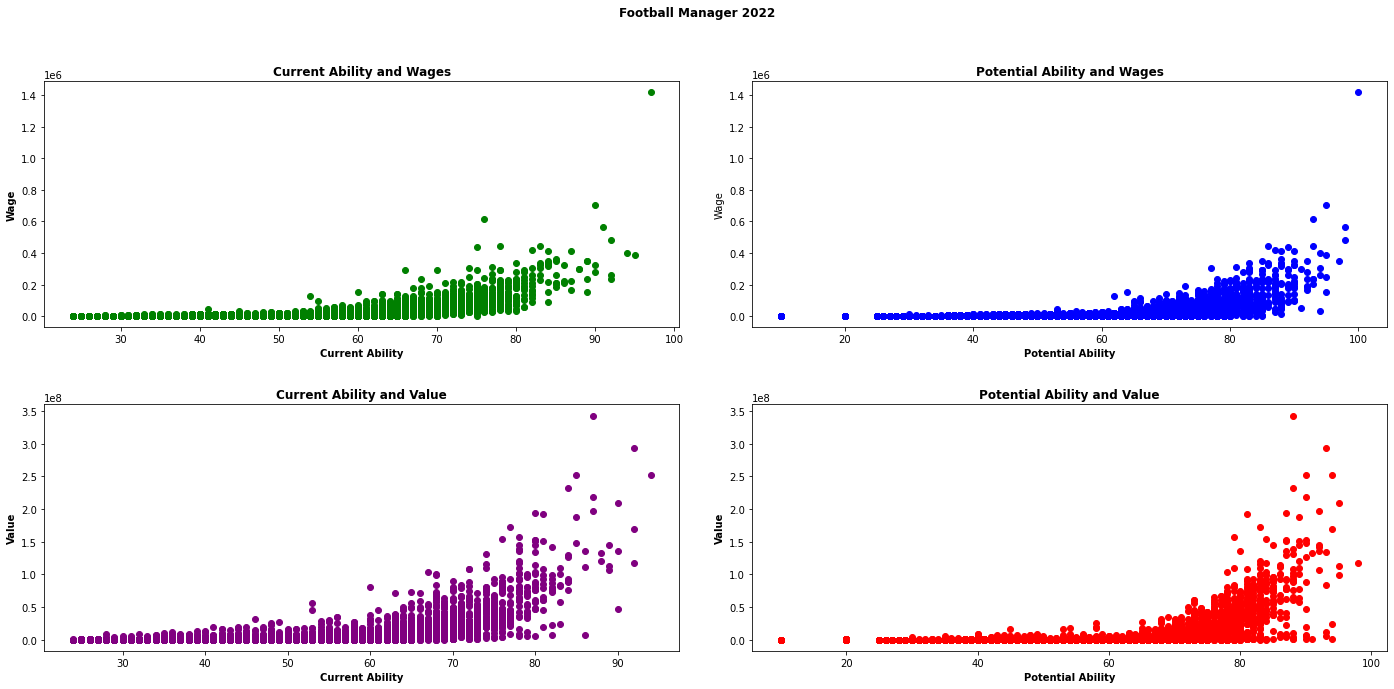

In [31]:
fig, axs = plt.subplots(2, 2)

fig.suptitle('Football Manager 2022', fontweight='bold')

axs[0, 0].scatter(clean_fb22['Ability'], clean_fb22['Wages'], color = 'green')
axs[0, 0].set_title('Current Ability and Wages', fontweight='bold')
axs[0, 0].set_xlabel('Current Ability', fontweight='bold')
axs[0, 0].set_ylabel('Wage', fontweight='bold')

axs[0, 1].scatter(clean_fb22['Potential'], clean_fb22['Wages'], color = 'blue')
axs[0, 1].set_title('Potential Ability and Wages', fontweight='bold')
axs[0, 1].set_xlabel('Potential Ability', fontweight='bold')
axs[0, 1].set_ylabel('Wage')

axs[1, 0].scatter(clean_fb22['Ability'], clean_fb22['Sell value'], color = 'purple')
axs[1, 0].set_title('Current Ability and Value', fontweight='bold')
axs[1, 0].set_xlabel('Current Ability', fontweight='bold')
axs[1, 0].set_ylabel('Value', fontweight='bold')

axs[1, 1].scatter(clean_fb22['Potential'], clean_fb22['Sell value'], color = 'red')
axs[1, 1].set_title('Potential Ability and Value', fontweight='bold')
axs[1, 1].set_xlabel('Potential Ability', fontweight='bold')
axs[1, 1].set_ylabel('Value', fontweight='bold')

fig.tight_layout(pad=3.0)

### Step 2.3: Data Quality and Distributions <a id='step-2-3'></a>

Here is a big issue with noisy data. Just like in most sport, there are a lot of players that don;t earn that much comapred to the very top players. For example, looking at Lionel Messi or Cristiano Ronaldo and comapring their traits against an average player in a lower league is an issue. However I have already cleaned the data above and these extremely high values are not surprising since the top earners do out eanr almost everyone combined. With this in mind, what can be done to help this issue is to scale the data before any type of analysis.

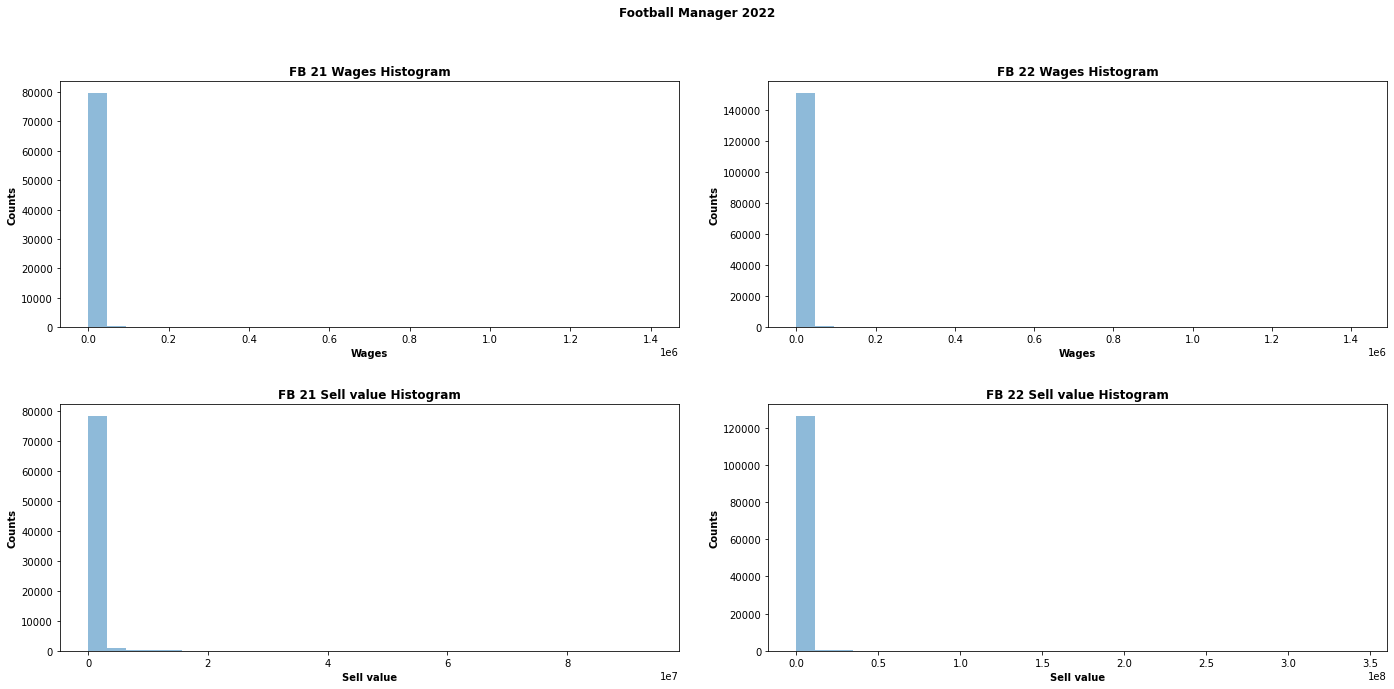

In [32]:
fig, axs = plt.subplots(2, 2)

fig.suptitle('Football Manager 2022', fontweight='bold')

axs[0, 0].hist(clean_fb21['Wages'], bins=30, alpha=0.5)
axs[0, 0].set_title('FB 21 Wages Histogram', fontweight='bold')
axs[0, 0].set_xlabel('Wages', fontweight='bold')
axs[0, 0].set_ylabel('Counts', fontweight='bold')

axs[0, 1].hist(clean_fb22['Wages'], bins=30, alpha=0.5)
axs[0, 1].set_title('FB 22 Wages Histogram', fontweight='bold')
axs[0, 1].set_xlabel('Wages', fontweight='bold')
axs[0, 1].set_ylabel('Counts', fontweight='bold')

axs[1, 0].hist(clean_fb21['Sell value'], bins=30, alpha=0.5)
axs[1, 0].set_title('FB 21 Sell value Histogram', fontweight='bold')
axs[1, 0].set_xlabel('Sell value', fontweight='bold')
axs[1, 0].set_ylabel('Counts', fontweight='bold')

axs[1, 1].hist(clean_fb22['Sell value'], bins=30, alpha=0.5)
axs[1, 1].set_title('FB 22 Sell value Histogram', fontweight='bold')
axs[1, 1].set_xlabel('Sell value', fontweight='bold')
axs[1, 1].set_ylabel('Counts', fontweight='bold')

fig.tight_layout(pad=3.0)

### Step 2.4: Interesting Correlations <a id='step-2-4'></a>

These correlations help to solidify my argument that players with a high Potential, considered top talents are given extremely high wages and sale value, almost overpricing them in the present for what they may offer in the future becuase the correlation between Potential and Sell value and Wages is extremely high.

#### Football Manager 2021

In [33]:
clean_fb21[['Wages', 'Sell value', 'Goals', 'Weight', 'Potential', 'Ability']].corr()

,Wages,Sell value,Goals,Weight,Potential,Ability
Wages,1.000000,0.737497,0.458489,0.050644,0.296725,0.277882
Sell value,0.737497,1.000000,0.295324,0.035881,0.301136,0.279873
Goals,0.458489,0.295324,1.000000,0.027657,0.153278,0.138723
Weight,0.050644,0.035881,0.027657,1.000000,0.142557,0.126907
Potential,0.296725,0.301136,0.153278,0.142557,1.000000,0.885040
Ability,0.277882,0.279873,0.138723,0.126907,0.885040,1.000000


#### Football Manager 2022

In [34]:
clean_fb22[['Wages', 'Sell value', 'Goals', 'Weight', 'Potential', 'Ability']].corr()

,Wages,Sell value,Goals,Weight,Potential,Ability
Wages,1.000000,0.719821,0.404948,0.113250,0.342393,0.372334
Sell value,0.719821,1.000000,0.232424,0.077898,0.297441,0.323693
Goals,0.404948,0.232424,1.000000,0.060771,0.168044,0.166553
Weight,0.113250,0.077898,0.060771,1.000000,0.366914,0.357352
Potential,0.342393,0.297441,0.168044,0.366914,1.000000,0.863065
Ability,0.372334,0.323693,0.166553,0.357352,0.863065,1.000000


## Step 3: Identify 1-3 research questions and perform analysis <a id='step-3'></a>

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well. 

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.



### Step 3.1: Question 1 <a id='step-3-1'></a>
Can we find players that have very good attributes with a low value by clustering players together by attributes? (K-Means Clustering)
* Data Sets Used --> clean_fb21(Football Manager 2021) and clean_fb22(Football Manager 2022)
* Technique --> K-Means Clustering 
* How --> Plotting the clusters values as colors against interesting variable on the x and y axis.

In [35]:
class K_Means_Package:
    def scale_and_check(self, df):
        scaler = StandardScaler()
        scaled_values = scaler.fit_transform(df.values)

        training_data_mean = np.mean(scaled_values, axis=0)
        training_data_sddev = np.std(scaled_values, axis=0)

        training_mean_sddev_df = pd.DataFrame(data = list(zip(list(df.columns), 
                                                              training_data_mean, 
                                                              training_data_sddev)), 
                                               columns = ['Columns', 'Mean', 'Standard Deviation'])
        print('{}\n'.format(training_mean_sddev_df))

        return scaled_values
    
    def k_means_loop(self, scaled_values, seed):
        inertia_dict = {}
        for k_val in range(1, 10):
            kmeans_iter = KMeans(n_clusters = k_val, random_state = seed).fit(scaled_values)
            inertia_dict.update({'{}'.format(k_val): kmeans_iter.inertia_})

        return inertia_dict  
    
    def plot_elbow_curve(self, dictionary_inertia, title):
        plt.plot(list(dictionary_inertia.keys()), 
                 list(dictionary_inertia.values()),
                 marker = 'o')
        plt.title('{}'.format(title), fontweight = 'bold')
        plt.xlabel('K Value', fontweight = 'bold')
        plt.ylabel('Inertia', fontweight = 'bold')
        plt.show()
        
    def single_k_run(self, k_value, seed, scaled_values):
        kmeans_single = KMeans(n_clusters = k_value, random_state = seed).fit(scaled_values)
        
        return kmeans_single
    
    def k_means_group_compare(self, data1, x1, y1, title1, data2, x2, y2, title2):
        fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 10))

        fig.suptitle('Cluster Analysis Comparison', fontweight='bold')

        sns.scatterplot(ax = ax1,
                        x = '{}'.format(x1),
                        y = '{}'.format(y1), 
                        hue = "Cluster",
                        data = data1,
                        palette = "icefire")
        ax1.set_title('{}'.format(title1), fontweight='bold')
        ax1.set_xlabel('{}'.format(x1), fontweight='bold')
        ax1.set_ylabel('{}'.format(y2), fontweight='bold')

        sns.scatterplot(ax = ax2,
                        x = '{}'.format(x2),
                        y = '{}'.format(y1), 
                        hue = "Cluster",
                        data = data2,
                        palette = "viridis")
        ax2.set_title('{}'.format(title2), fontweight='bold')
        ax2.set_xlabel('{}'.format(x2), fontweight='bold')
        ax2.set_ylabel('{}'.format(y2), fontweight='bold')

In [36]:
k_means_package = K_Means_Package()

### Step 3.1.1: Selecting Numeric Values for K-Means Clustering <a id='step-3-1-1'></a>

In [37]:
remove_coluns_k_means = list(missing_value_count_fb22['Column Name'].values)
keep_these = ['Potential', 'Sell value', 'Wages']
all_columns = list(clean_fb22.columns)
k_means_columns = [x for x in all_columns if x not in remove_coluns_k_means]
k_means_columns = k_means_columns + keep_these

In [38]:
k_means_df_fb21 = clean_fb21[k_means_columns]
k_means_df_fb21 = k_means_df_fb21.dropna(subset=['Potential'], inplace=False)
k_means_df_numeric_fb21 = k_means_df_fb21.select_dtypes(include=np.number)
k_means_df_numeric_fb21.reset_index(inplace = True, drop = True)
k_means_df_numeric_fb21.drop(['Sell value', 'Wages'], axis=1, inplace=True)

In [39]:
k_means_df_fb22 = clean_fb22[k_means_columns]
k_means_df_fb22 = k_means_df_fb22.dropna(subset=['Potential'], inplace=False)
k_means_df_numeric_fb22 = k_means_df_fb22.select_dtypes(include=np.number)
k_means_df_numeric_fb22.reset_index(inplace = True, drop = True)
k_means_df_numeric_fb22.drop(['Sell value', 'Wages'], axis=1, inplace=True)

### Step 3.1.2: Scaling Values with Mean of 0 and Standard Deviation of 1 <a id='step-3-1-2'></a>

In [40]:
fb_21_scaled = k_means_package.scale_and_check(df = k_means_df_numeric_fb21)

             Columns          Mean  Standard Deviation
0                Age -1.353625e-16                 1.0
1             Length  1.870430e-15                 1.0
2             Weight  3.501769e-16                 1.0
3            Ability  1.765598e-16                 1.0
4        First Touch  1.000505e-16                 1.0
5   Free Kick Taking -3.531195e-17                 1.0
6            Passing  8.239456e-17                 1.0
7     Penalty Taking  2.942663e-18                 1.0
8          Technique -8.827989e-18                 1.0
9         Aggression -1.412478e-16                 1.0
10      Anticipation  1.059359e-16                 1.0
11           Bravery  2.236424e-16                 1.0
12         Composure  2.354130e-16                 1.0
13     Concentration  9.416521e-17                 1.0
14         Decisions  1.029932e-17                 1.0
15     Determination  4.413994e-18                 1.0
16             Flair  1.118212e-16                 1.0
17        

In [41]:
fb_22_scaled = k_means_package.scale_and_check(df = k_means_df_numeric_fb22)

             Columns          Mean  Standard Deviation
0                Age -3.110101e-16                 1.0
1             Length -1.095489e-15                 1.0
2             Weight  3.792806e-17                 1.0
3            Ability  1.314839e-16                 1.0
4        First Touch  2.477967e-16                 1.0
5   Free Kick Taking  1.314839e-16                 1.0
6            Passing  2.427396e-16                 1.0
7     Penalty Taking -3.539952e-17                 1.0
8          Technique  2.680250e-16                 1.0
9         Aggression -1.137842e-17                 1.0
10      Anticipation  2.933103e-16                 1.0
11           Bravery  2.275684e-16                 1.0
12         Composure -2.629679e-16                 1.0
13     Concentration  6.068490e-17                 1.0
14         Decisions -6.068490e-17                 1.0
15     Determination  1.491837e-16                 1.0
16             Flair -2.781391e-17                 1.0
17        

### Step 3.1.3: Choosing a Value of K Using the Elbow Method <a id='step-3-1-3'></a>

In [42]:
k_means_values_fb_21 = k_means_package.k_means_loop(scaled_values = fb_21_scaled,
                                                    seed = seed)

In [43]:
k_means_values_fb_22 = k_means_package.k_means_loop(scaled_values = fb_22_scaled,
                                                    seed = seed)

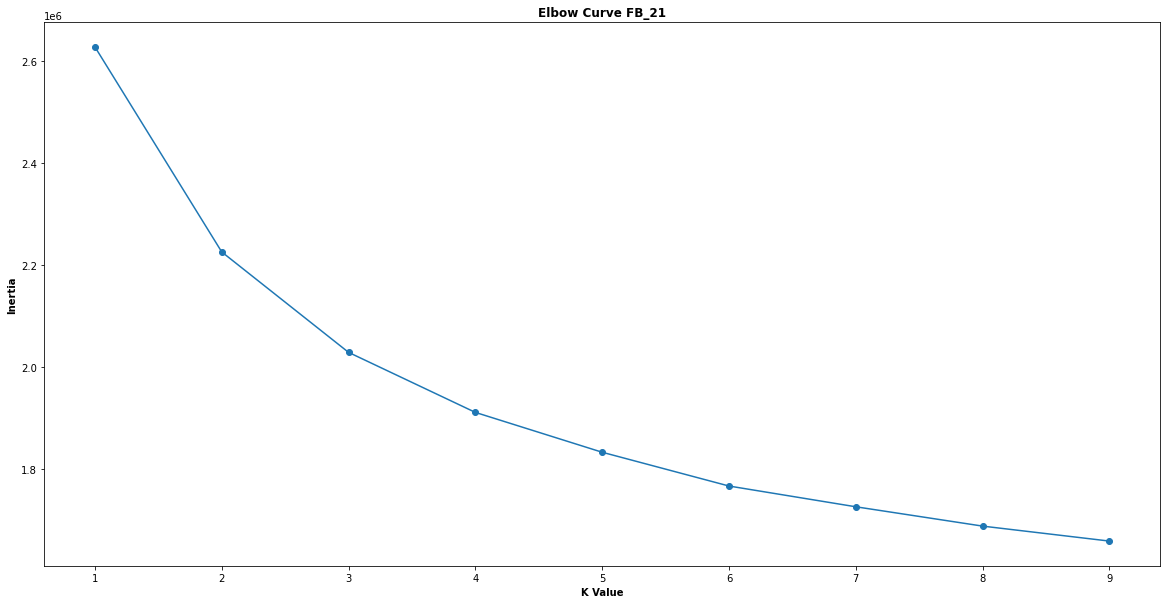

In [44]:
k_means_package.plot_elbow_curve(dictionary_inertia = k_means_values_fb_21, 
                                 title = 'Elbow Curve FB_21')

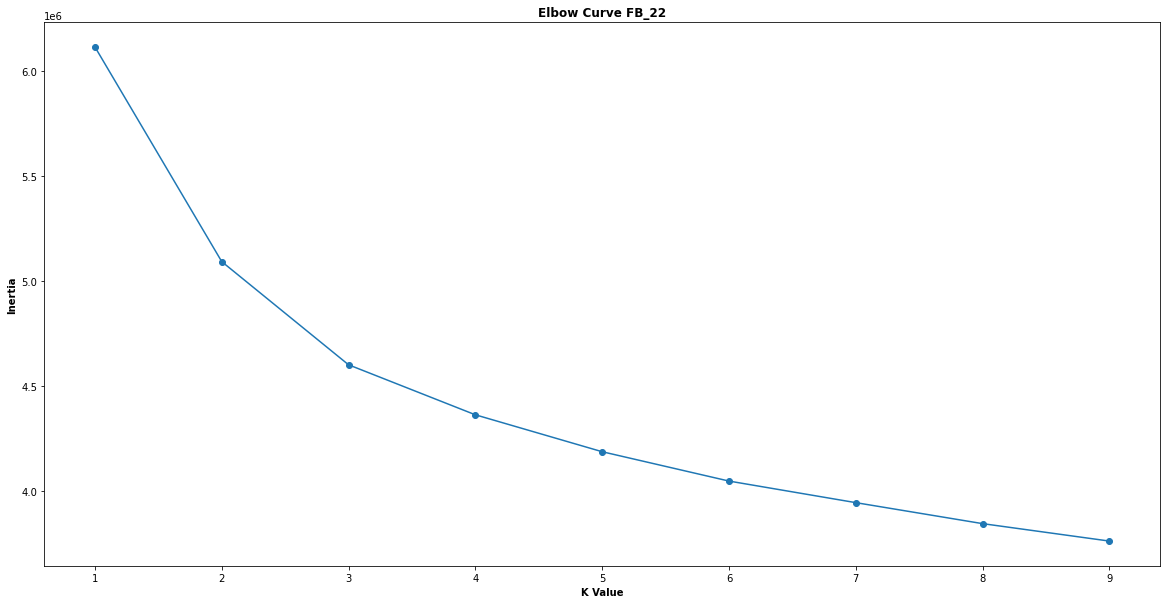

In [45]:
k_means_package.plot_elbow_curve(dictionary_inertia = k_means_values_fb_22,
                                 title = 'Elbow Curve FB_22')

Based on the plots it looks like the elbow point is at k = 3 for both the FB_21 and FB_22 data sets. Therefore I will re-run this with k = 3 and look for any patterns. 

### Step 3.1.4: Re-Running with k = 3 and Assigning Cluster to Data<a id='step-3-1-4'></a>

In [46]:
fb_21_k_3 = k_means_package.single_k_run(k_value = 3, 
                                         seed = seed, 
                                         scaled_values = fb_21_scaled)
k_means_df_fb21['Cluster'] = fb_21_k_3.labels_
k_means_df_fb21['Cluster'] = k_means_df_fb21['Cluster'].astype('float')

In [47]:
fb_22_k_3 = k_means_package.single_k_run(k_value = 3, 
                                         seed = seed, 
                                         scaled_values = fb_22_scaled)
k_means_df_fb22['Cluster'] = fb_22_k_3.labels_
k_means_df_fb22['Cluster'] = k_means_df_fb22['Cluster'].astype('float')

### Step 3.1.5: Comparing Cluster Plots<a id='step-3-1-5'></a>

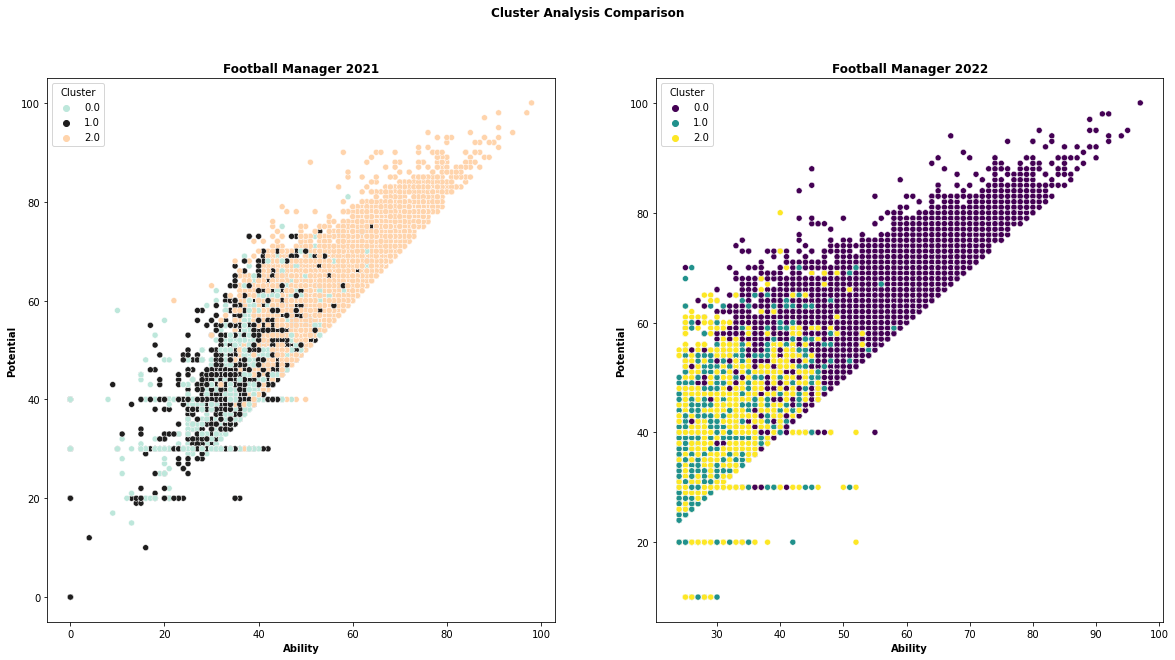

In [48]:
k_means_package.k_means_group_compare(data1 = k_means_df_fb21, 
                                      x1 = 'Ability', 
                                      y1 = 'Potential', 
                                      title1 = 'Football Manager 2021',
                                      data2 = k_means_df_fb22, 
                                      x2 = 'Ability', 
                                      y2 = 'Potential', 
                                      title2 = 'Football Manager 2022')

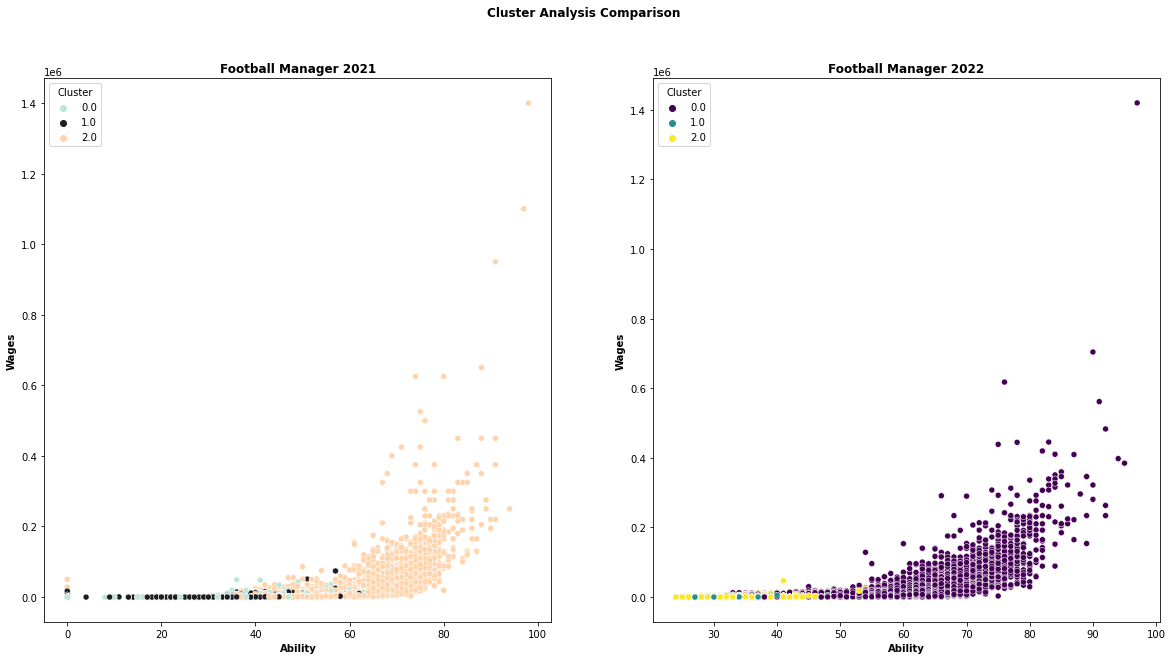

In [49]:
k_means_package.k_means_group_compare(data1 = k_means_df_fb21, 
                                      x1 = 'Ability', 
                                      y1 = 'Wages', 
                                      title1 = 'Football Manager 2021',
                                      data2 = k_means_df_fb22, 
                                      x2 = 'Ability', 
                                      y2 = 'Wages', 
                                      title2 = 'Football Manager 2022')

### Step 3.2: Question 2 <a id='step-3-2'></a>
What attributes are the most important when it comes down to a player’s value? (Linear Regression)

* Data Sets Used --> clean_fb22(Football Manager 2022)
* Technique --> Linear Regression
* How --> I'll look at the variables value and significant level to see how important they are to calculating a player's salary or value.

In [50]:
class Linear_Regression_Package:
    def split_data(self, X, y, test_size, seed):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
        print('The number of rows in the training data set are {}, and the number of rows in the testing data set are {}.'.format(len(X_train), len(X_test)))
        
        return X_train, X_test, y_train, y_test
    
    def scale_data(self, X_train, X_test):
        scaler = StandardScaler()
        
        scaled_X_train = scaler.fit_transform(X_train.values)
        scaled_X_test = scaler.fit_transform(X_test.values)
        
        training_data_mean = np.mean(scaled_X_train, axis=0)
        training_data_sddev = np.std(scaled_X_train, axis=0)
        train_mean_sddev_df = pd.DataFrame(data = list(zip(list(X.columns), training_data_mean, training_data_sddev)), 
                                       columns = ['Columns', 'Mean', 'Standard Deviation'])
        print('Training\n{}\n'.format(train_mean_sddev_df))
        
        
        testing_data_mean = np.mean(scaled_X_test, axis=0)
        testing_data_sddev = np.std(scaled_X_test, axis=0)

        test_mean_sddev_df = pd.DataFrame(data = list(zip(list(X.columns), testing_data_mean, testing_data_sddev)), 
                                       columns = ['Columns', 'Mean', 'Standard Deviation'])
        print('Training\n{}'.format(test_mean_sddev_df))
        
        return scaled_X_train, scaled_X_test
    
    def fitting_model(self, scaled_X_train, y_train):
        lin_reg = LinearRegression().fit(scaled_X_train, y_train)
        
        lin_reg_coef = lin_reg.coef_.tolist()[0]
        lin_reg_inter = lin_reg.intercept_.tolist()

        lin_reg_coef_df = pd.DataFrame(data = list(zip(list(X.columns), lin_reg_coef)), 
                                       columns = ['Columns', 'Coefficients'])

        lin_reg_inter_df = pd.DataFrame(data = list(zip(lin_reg_inter)), 
                                       columns = ['Intercept'])
        
        return lin_reg, lin_reg_coef_df, lin_reg_inter_df
    
    def predictions_and_model_performance(self, lin_reg, scaled_X_test):
        lin_reg_y_pred_test = lin_reg.predict(scaled_X_test)

        lin_reg_mse_test = mean_squared_error(y_test, lin_reg_y_pred_test)
        lin_reg_r2_test = r2_score(y_test, lin_reg_y_pred_test)

        print('Mean Squared Error: {}\nR^2 Score: {}'.format(lin_reg_mse_test, lin_reg_r2_test))
        
        return lin_reg_y_pred_test
    
    def plot_predictions(self, y_test, lin_reg_y_pred_test):
        plt.scatter(list(range(0, len(y_test))), 
                    y_test, 
                    color = 'blue')
        plt.scatter(list(range(0, len(lin_reg_y_pred_test))), 
                    lin_reg_y_pred_test, 
                    color = 'red')
        plt.title("Predicted and True Values", fontweight="bold", size = 20)
        plt.xlabel("Index", fontweight="bold", size = 14)
        plt.ylabel("Player Sell Value", fontweight="bold", size = 14)

In [51]:
linear_regression_package = Linear_Regression_Package()

### Step 3.2.1: Selecting Modelling Values for Linear Regression<a id='step-3-2-1'></a>

Here I chose the model inputs as columns with a high correlation to Sell value and then I added some that I thought would be important such as 'Age', 'Length', 'Weight', 'Pace', 'Strength', 'Stamina'.

In [52]:
corr_value = pd.DataFrame(clean_fb22.corr()['Sell value']).reset_index(drop = False)
corr_value.columns = ['Variable', 'Value']
corr_value.sort_values(by = 'Value', ascending = False, inplace = True, ignore_index = True)

In [53]:
variables = list(corr_value['Variable'].values)[0:8] + ['Age', 'Length', 'Weight', 'Pace', 'Strength', 'Stamina']

Here I am removing outliers such as players with a Sell value over three standard deviations.

In [54]:
lin_reg_df_fb22 = clean_fb22[variables]
lin_reg_df_fb22 = lin_reg_df_fb22.dropna(subset=['Potential', 'Sell value'], inplace=False)
non_outliers = list(lin_reg_df_fb22['Sell value'][(np.abs(stats.zscore(lin_reg_df_fb22)) < 3).all(axis=1)].index)
lin_reg_df_fb22 = lin_reg_df_fb22.loc[non_outliers]

lin_reg_df_numeric_fb22 = lin_reg_df_fb22.select_dtypes(include=np.number)
lin_reg_df_numeric_fb22.reset_index(inplace = True, drop = True)

### Step 3.2.2: Splitting Data into Training and Testing<a id='step-3-2-2'></a>

In [55]:
X = lin_reg_df_numeric_fb22.loc[:, lin_reg_df_numeric_fb22.columns != 'Sell value'].copy()
y = lin_reg_df_numeric_fb22[['Sell value']].copy()

In [56]:
splitting_data = linear_regression_package.split_data(X = X, 
                                                      y = y, 
                                                      test_size = 0.25, 
                                                      seed = seed)

X_train = splitting_data[0]
X_test = splitting_data[1]
y_train = splitting_data[2]
y_test = splitting_data[3]

The number of rows in the training data set are 74393, and the number of rows in the testing data set are 24798.


### Step 3.2.3: Scaling Modelling Value<a id='step-3-2-3'></a>

In [57]:
scaling_data = linear_regression_package.scale_data(X_train = X_train, X_test = X_test)
scaled_X_train = scaling_data[0]  
scaled_X_test = scaling_data[1]

Training
      Columns          Mean  Standard Deviation
0       Wages -3.080263e-17                 1.0
1     Ability  5.386879e-17                 1.0
2   Potential  3.013405e-16                 1.0
3       Goals -2.086938e-17                 1.0
4        Caps  3.094590e-17                 1.0
5   Composure -1.564129e-16                 1.0
6    Teamwork -3.067847e-16                 1.0
7         Age -2.884464e-16                 1.0
8      Length -1.446196e-15                 1.0
9      Weight  4.894992e-17                 1.0
10       Pace -3.759354e-16                 1.0
11   Strength -2.170989e-16                 1.0
12    Stamina -6.265590e-17                 1.0

Training
      Columns          Mean  Standard Deviation
0       Wages  2.893976e-17                 1.0
1     Ability  2.500710e-16                 1.0
2   Potential  1.899709e-16                 1.0
3       Goals -2.557301e-17                 1.0
4        Caps -2.808016e-17                 1.0
5   Composure -8.9398

### Step 3.2.4: Fitting the Model and Getting Coefficients<a id='step-3-2-4'></a>

In [58]:
model_fitting = linear_regression_package.fitting_model(scaled_X_train = scaled_X_train, 
                                                        y_train = y_train)

model = model_fitting[0]
coefficients = model_fitting[1] 
intercept = model_fitting[2]

coefficients.loc[len(coefficients.index)] = ['Model Y-Intercept', intercept.iloc[0][0]] 

coefficients.sort_values(by = ['Coefficients'], ascending = False, inplace = True, ignore_index = True)
coefficients['Coefficients'] = round(coefficients['Coefficients'], 2)

### Step 3.2.5: Model Prediction and Performance <a id='step-3-2-5'></a>

In [59]:
model_predictions = linear_regression_package.predictions_and_model_performance(lin_reg = model, 
                                                                                scaled_X_test = scaled_X_test)

preds = np.reshape(model_predictions, newshape = (-11, len(model_predictions)))[0].tolist()

Mean Squared Error: 446933967776.87476
R^2 Score: 0.4092700362099422


In [60]:
y_vals = list(y_test['Sell value'].values)

There are a lot of players with a very high 

With an R-Squared value of 0.40 and such a high MSE value, I believe that a different model will have to be used or to subset the players into smaller groups and then re-model. As we can see the model did not do well with the players that have a high sell value, only wht players with a lower sell value. This could be because maybe a lot of the training data may of not been distributed evenly between high and low value players.

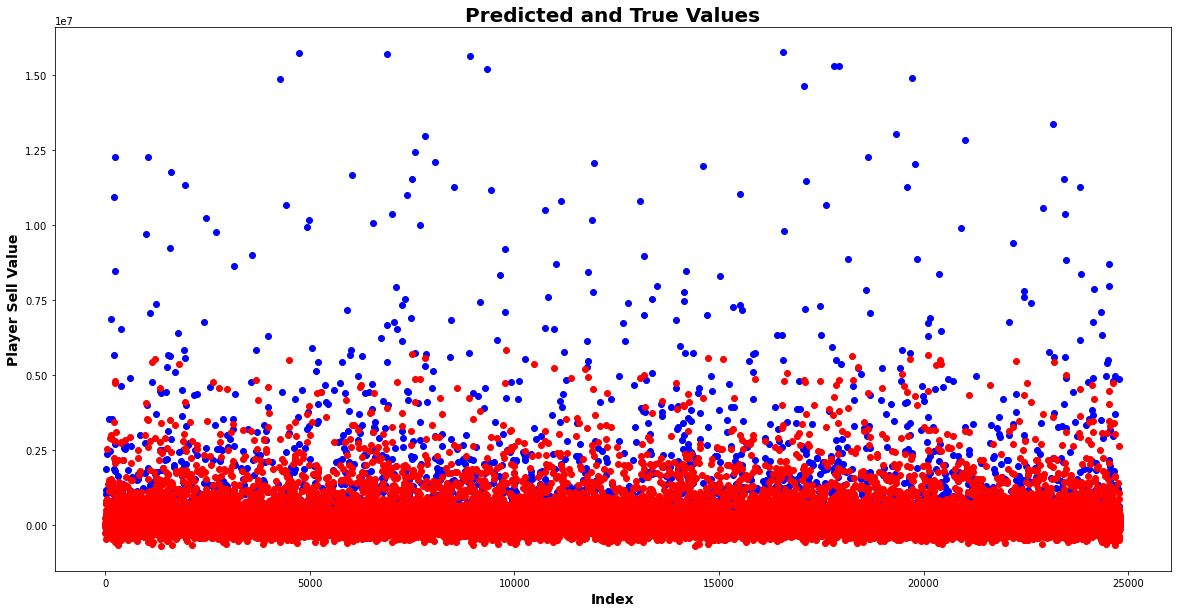

In [61]:
linear_regression_package.plot_predictions(y_test = y_vals, 
                                           lin_reg_y_pred_test = preds)

### Step 3.3: Question 3 <a id='step-3-3'></a>
How have the top up and coming players improved or worsened between the 2021 data and 2022 data and how has that affected their value?

* Data Sets Used --> final_merge_difference(Merged Difference Data)
* Technique --> Heatmap and Hierarchical Clustering
* How --> By looking at the heatmap values I can see which players are values low, but improved a lot over a year. Also by using the Hierarchical Clustering, I am able to try and make sense of these top prospect.

### Step 3.3.1: Preparing Data <a id='step-3-3-1'></a>

In [62]:
missing_value_count_merge = pd.DataFrame(final_merge_difference.isna().sum()).reset_index(drop = False)
missing_value_count_merge.columns = ['Column Name', 'Missing Value Counts']
missing_value_count_merge.sort_values(by = ['Missing Value Counts'], ascending = False, inplace = True, ignore_index = True)
missing_value_count_merge = missing_value_count_merge[missing_value_count_merge['Missing Value Counts'] > 0]
missing_value_count_merge['Percent of Missing Values'] = missing_value_count_merge['Missing Value Counts']/len(final_merge_difference)
missing_value_count_merge['Percent of Missing Values'] = missing_value_count_merge['Percent of Missing Values'] * 100

### Step 3.3.2: Defining Top Prospects <a id='step-3-3-2'></a>

In [63]:
remove_coluns_merge = list(missing_value_count_merge['Column Name'].values) + ['Age', 'Length', 'Weight', 'Caps', 'Goals', 'Sell value']
keep_these = ['Potential', 'Wages']
all_columns_merge = list(final_merge_difference.columns)
merge_columns = [x for x in all_columns_merge if x not in remove_coluns_merge]
merge_columns = merge_columns + keep_these

I defined a top prospect as a player with either the Ability or Potential Ability of being over 60. This is an arbitrary value that I chose as a baseline.

In [64]:
dif_df_sub = final_merge_difference[merge_columns]
dif_df_sub = dif_df_sub.dropna(subset=['Potential', 'Wages'], inplace=False)
dif_df_sub = dif_df_sub[(dif_df_sub['Ability'] > 60) | (dif_df_sub['Potential'] > 60)]
dif_df_sub.reset_index(inplace = True, drop = True)
dif_df_sub_numeric = dif_df_sub.select_dtypes(include=np.number)
dif_df_sub_numeric.reset_index(inplace = True, drop = True)

### Step 3.3.3: Rescaling Data <a id='step-3-3-3'></a>

In [65]:
scaler = StandardScaler()
scaled_values_dif = scaler.fit_transform(dif_df_sub_numeric.values)
scaled_values_dif_df = pd.DataFrame(scaled_values_dif, columns = dif_df_sub_numeric.columns)
scaled_values_dif_df['Name'] = dif_df_sub['Name']
scaled_values_dif_df.set_index('Name', inplace = True)

### Step 3.3.4: Heatmap of year over year Improvements <a id='step-3-3-4'></a>

Text(158.5, 0.5, 'Player')

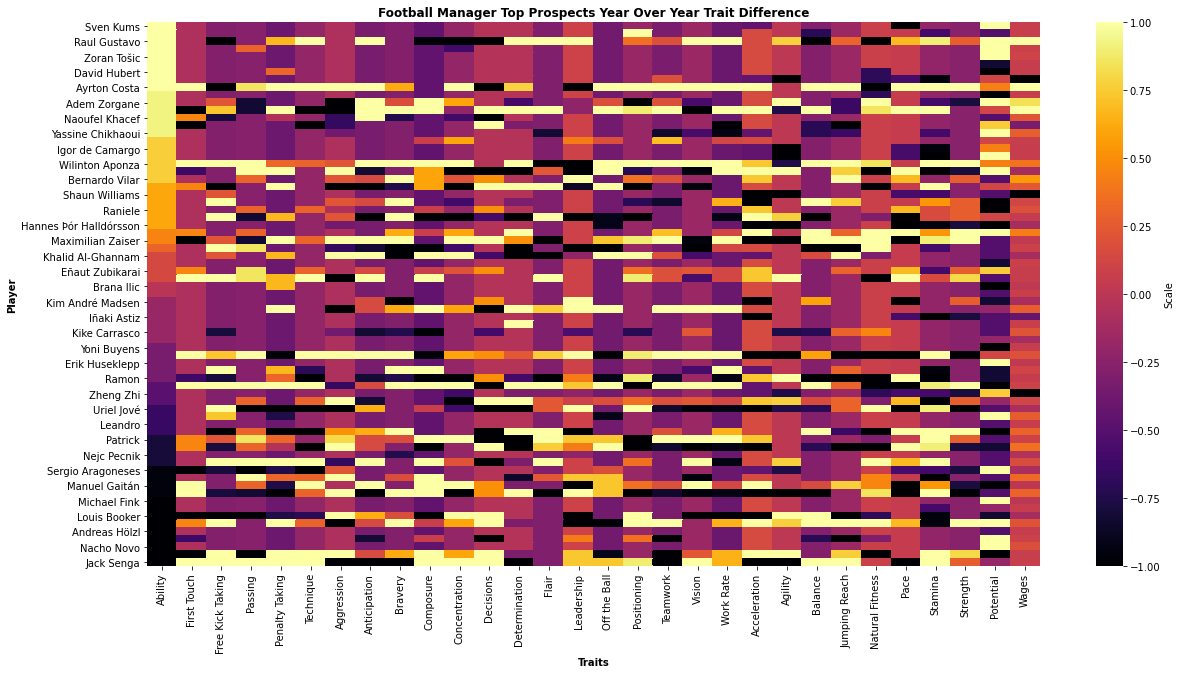

In [66]:
ax101 = sns.heatmap(data = scaled_values_dif_df, 
            cmap="inferno",
            vmin = -1.0, 
            vmax = 1.0,
            cbar_kws={'label': 'Scale'})

ax101.set_title('Football Manager Top Prospects Year Over Year Trait Difference', fontweight='bold')
ax101.set_xlabel('Traits', fontweight='bold')
ax101.set_ylabel('Player', fontweight='bold')

### Step 3.3.5: Hierarchical Clustering<a id='step-3-3-5'></a>

In [67]:
hc_clustering = AgglomerativeClustering().fit(scaled_values_dif_df)
scaled_values_dif_df['Cluster'] = hc_clustering.labels_

dif_df_sub_numeric['Cluster'] = hc_clustering.labels_

Text(0, 0.5, 'Player')

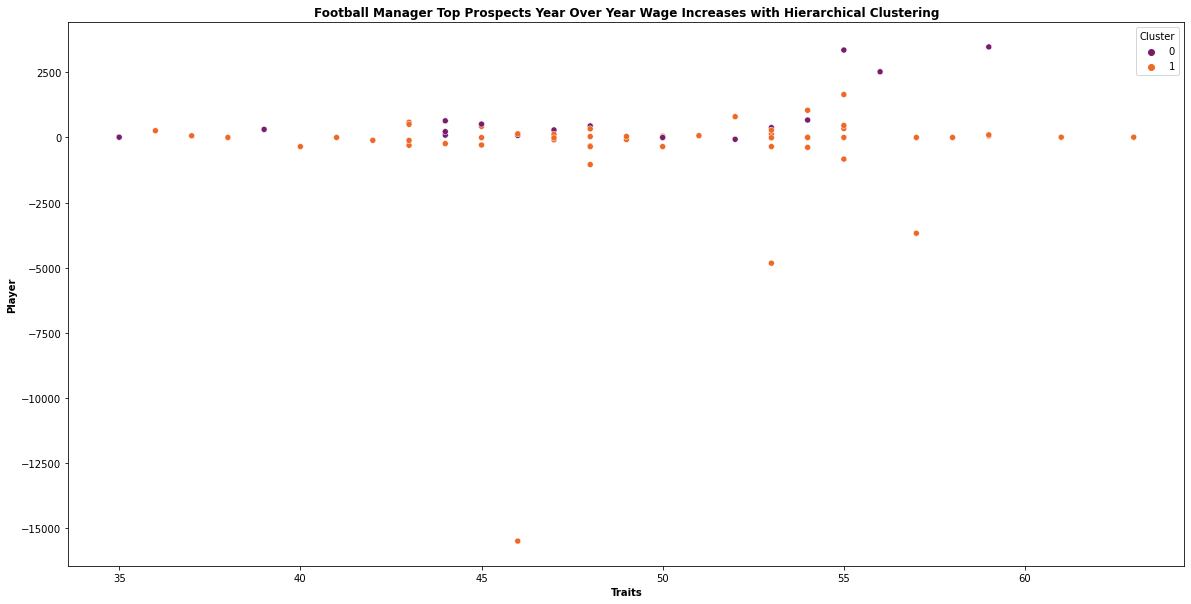

In [68]:
ax = sns.scatterplot(x = 'Ability',
                     y = 'Wages',
                hue = "Cluster",
                data = dif_df_sub_numeric, alpha = 1,
                palette = "inferno")

ax.set_title('Football Manager Top Prospects Year Over Year Wage Increases with Hierarchical Clustering', fontweight='bold')
ax.set_xlabel('Traits', fontweight='bold')
ax.set_ylabel('Player', fontweight='bold')

## Step 4:  Present your findings <a id='step-4'></a>

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?  Use _matplotlib_ visualizations to present these findings.


__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


## Limitations <a id='limit'></a>

Overall the limiations of the data are that we are assuming that the ratings we are given are correct. With this in mind, I am not sure how these values are collected, for example, how can you arbirtrarily give one player a trait of strength of 20 and anoher a 12. With this in mind, it would be important to see the ways these metrics are calcualed.

Another limitation is that most players are not at the level of playing in a first division league in the top 5 including England, Spain, Germany, Italy and France, so most of the players in the dataset come from lower league. With this in mind, are we able to say that an unknown lower level player with the dribbling of 14 is equivalent to a player in a higher league with the dribbling of 14.

### Step 4.1: Finding Overlooked Players<a id='step-4-1'></a>

From the K-Means Clustering, I was abe to see top players divided between the clusters, which made it very easy to see the 'gems', or players that are overlooked. For example, in the Football Manager 2022 Graph below, the top players are those considered to be the players in the purple. With this in mind, any player in the purple, even those with a lower Ability can be considered a player that is overlooked. In conclusion by using this clustering technique we can see similar players by cluster atributes and take them more into consideration.

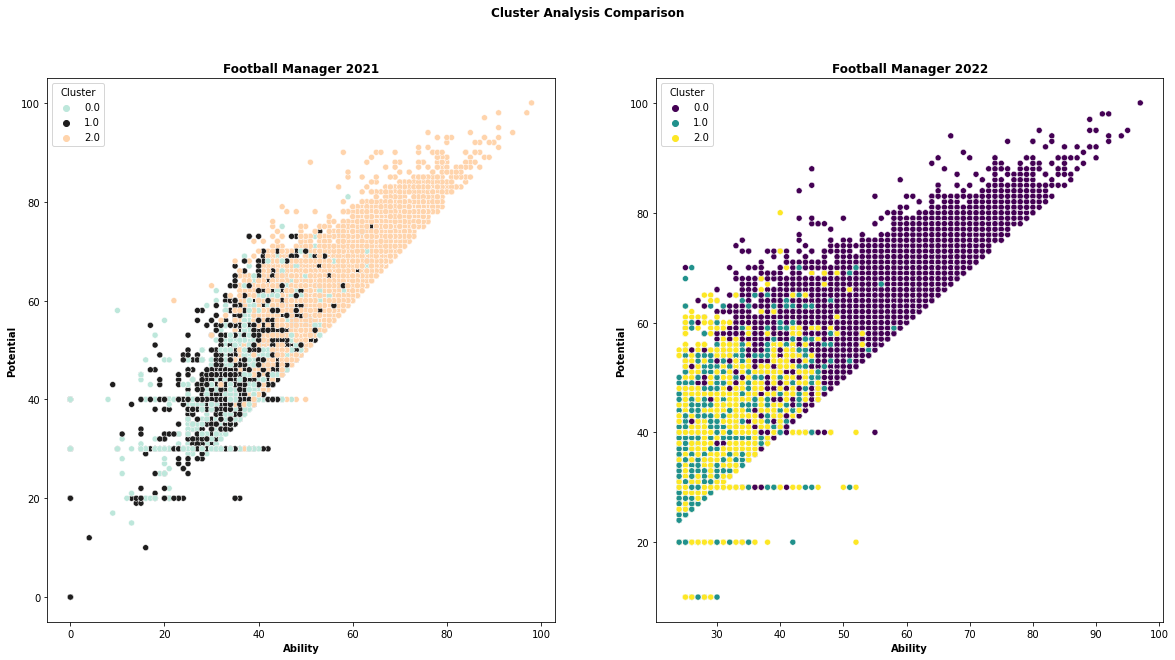

In [69]:
k_means_package.k_means_group_compare(data1 = k_means_df_fb21, 
                                      x1 = 'Ability', 
                                      y1 = 'Potential', 
                                      title1 = 'Football Manager 2021',
                                      data2 = k_means_df_fb22, 
                                      x2 = 'Ability', 
                                      y2 = 'Potential', 
                                      title2 = 'Football Manager 2022')

In this K-Means Clustering, I would take a look at the players in the purple for the Football Manager 2022 graph and even the players with a low ability in purple, makybe give them a chance to trial at my team. This is what the clustering is for, to find similarities between players and in this case find players that are on low wages but are in the same cluster or group as players with high ability.

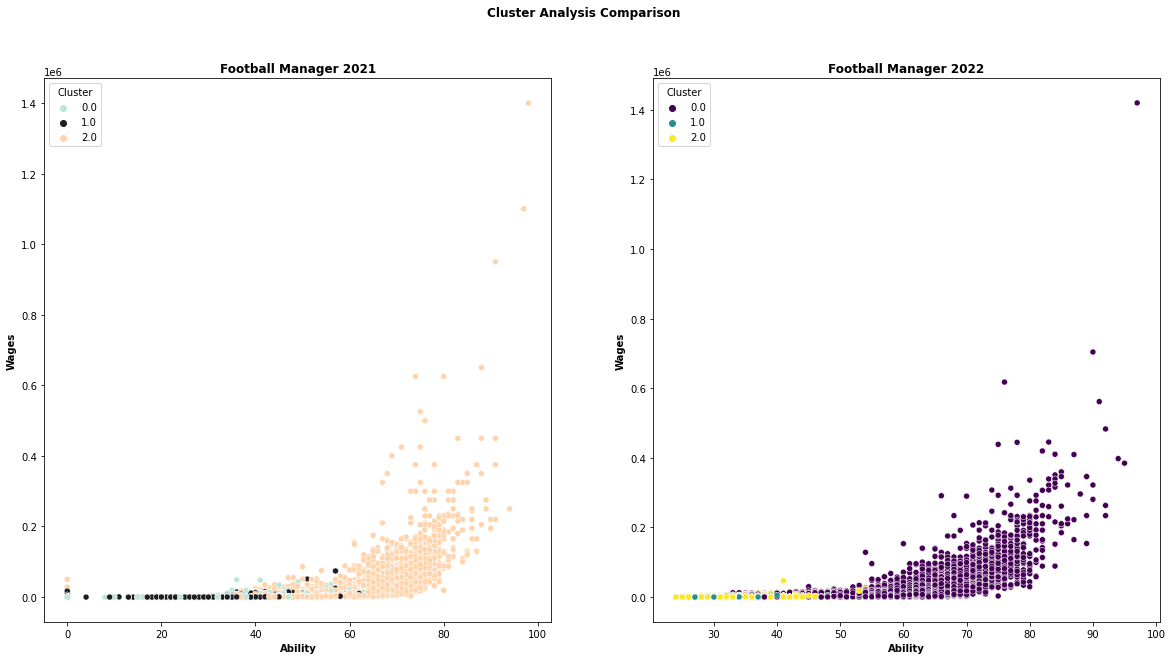

In [70]:
k_means_package.k_means_group_compare(data1 = k_means_df_fb21, 
                                      x1 = 'Ability', 
                                      y1 = 'Wages', 
                                      title1 = 'Football Manager 2021',
                                      data2 = k_means_df_fb22, 
                                      x2 = 'Ability', 
                                      y2 = 'Wages', 
                                      title2 = 'Football Manager 2022')

### Step 4.2: The Most Important Traits<a id='step-4-2'></a>

By modelling using Linear Regression, I was able to get the most important traits when predicting Sell value. From the table below I can see that the variables with the biggest effects were wages, and ability and potential. With this in mind, the effect with the biggest negative effect was age which makes sense because as a player gets older, he becomes les desirable.

In [71]:
coefficients

,Columns,Coefficients
0,Wages,437823.99
1,Model Y-Intercept,224050.18
2,Ability,149326.76
3,Potential,53193.98
4,Stamina,19746.86
5,Goals,13427.57
6,Composure,9609.86
7,Length,8688.90
8,Pace,-5073.46
9,Caps,-5930.46


### Step 4.3: Year Over Year Improvements<a id='step-4-3'></a>

Using the plots below we can see the players that improved the most year over year. For example, wecan see that a lot of players improved slightly with the light orange color being a very poplar shade in the heatmap. This makes sense, because over the course of a year you can only improve your abilities so much. It would be interesting to see how these players improve over three seasons.

Text(158.5, 0.5, 'Player')

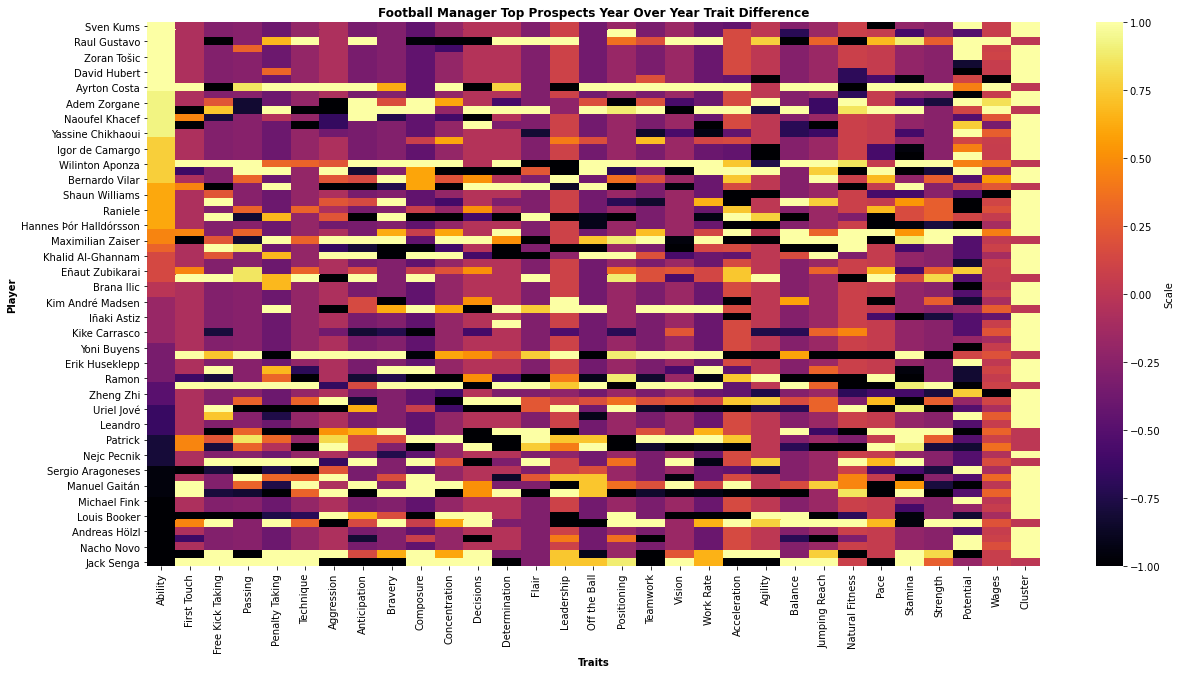

In [72]:
ax101 = sns.heatmap(data = scaled_values_dif_df, 
            cmap="inferno",
            vmin = -1.0, 
            vmax = 1.0,
            cbar_kws={'label': 'Scale'})

ax101.set_title('Football Manager Top Prospects Year Over Year Trait Difference', fontweight='bold')
ax101.set_xlabel('Traits', fontweight='bold')
ax101.set_ylabel('Player', fontweight='bold')

Using the Hierarchal Clustering we can see that the top prospect who got a wage decrease. This is important because using this you can scout players that have a high ability and try to recruit them becuase their wages went down.

Text(0, 0.5, 'Player')

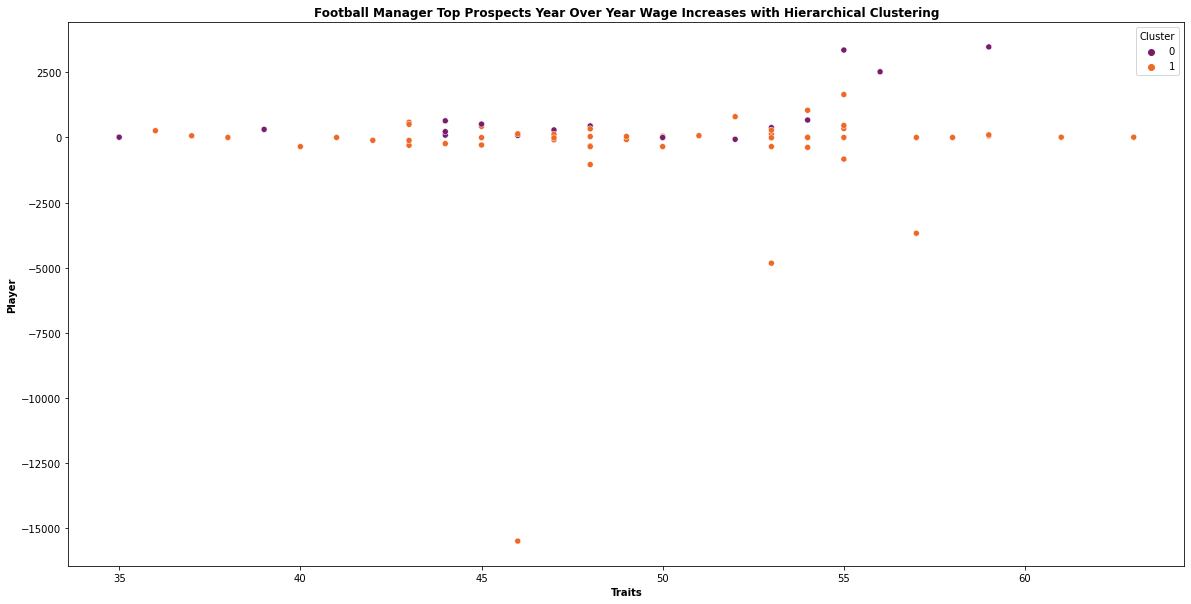

In [73]:
ax = sns.scatterplot(x = 'Ability',
                     y = 'Wages',
                hue = "Cluster",
                data = dif_df_sub_numeric, alpha = 1,
                palette = "inferno")

ax.set_title('Football Manager Top Prospects Year Over Year Wage Increases with Hierarchical Clustering', fontweight='bold')
ax.set_xlabel('Traits', fontweight='bold')
ax.set_ylabel('Player', fontweight='bold')